In [1]:
#Execute this cell if have problem with relative import

import sys; sys.path.insert(0, '..')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
pd.set_option('display.max_columns', None)
bat_df = pd.read_csv("../Data/Corpus_csv/batters_all_career.csv")

In [3]:
bat_df.shape

(12525, 78)

In [4]:
from Preprocessing.data_keys import headers_bat

In [5]:
from Preprocessing.data_frame_procces import filter_dataset, select_features

In [6]:
all_features = ['retirement_age','debut_decade','retirament_decade','total_seasons','play_in_mayors','play_in_negro_league','two_way_player','2B_bt',
'3B_bt','AB_bt','BA_bt','BB_bt','G_bt','HR_bt','H_bt','OBP_bt','OPS+_bt','OPS_bt','PA_bt','RAA_bt','RAR_bt','RBI_bt',
'R_bt','Rbaser_bt','Rbat_bt','Rdp_bt','Rfield_bt','Rpos_bt','Rrep_bt','SLG_bt','TB_bt','WAA_bt','WAR_bt','dWAR_bt',
'oRAR_bt','oWAR_bt','A_fd','CG_fd','Ch_fd','DP_fd','E_fd','Fld%_fd','GS_fd','G_fd','Inn_fd','PO_fd','RF/9_fd',
'RF/G_fd','CS_bt','IBB_bt','SB_bt','SF_bt','SH_bt','SO_bt','CS%_fd','CS_fd','PB_fd','SB_fd','WP_fd','HoF']

In [7]:
bat_df['retirement_age'] = (
        bat_df['retirement_age'].replace('desconocido', bat_df['retirement_age'].mode()[0])
    )
bat_df['retirement_age'] = bat_df['retirement_age'].astype('int64')

In [191]:
bat_df

,Id,Name,Active,First year,Last year,Url,Country,Bat hand,Throw hand,Full Name,HoF,HoF type,HoF year,HoF comittee,Player type,retirement_age,total_seasons,career_teams,career_leagues,first_position,second_position,play_in_mayors,play_in_negro_league,two_way_player,debut_decade,retirament_decade,2B_bt,3B_bt,AB_bt,BA_bt,BB_bt,CS_bt,G_bt,HR_bt,H_bt,IBB_bt,OBP_bt,OPS+_bt,OPS_bt,PA_bt,RAA_bt,RAR_bt,RBI_bt,R_bt,Rbaser_bt,Rbat_bt,Rdp_bt,Rfield_bt,Rpos_bt,Rrep_bt,SB_bt,SF_bt,SH_bt,SLG_bt,SO_bt,TB_bt,WAA_bt,WAR_bt,dWAR_bt,oRAR_bt,oWAR_bt,A_fd,CG_fd,CS%_fd,CS_fd,Ch_fd,DP_fd,E_fd,Fld%_fd,GS_fd,G_fd,Inn_fd,PB_fd,PO_fd,RF/9_fd,RF/G_fd,SB_fd,WP_fd
0,Aaron_Altherr_320,Aaron Altherr,False,2014,2019,https://www.baseball-reference.com//players/a/...,de,Right,Right,Aaron Samuel Altherr,0,-,-,-,2,28,6,['PHI'],['NL'],OF,-,1,0,0,2010,2010,54.0,10.0,1016.0,0.219,110.0,10.0,359.0,37.0,222.0,4.0,0.307,88.0,0.708,1156.0,-17.0,21.0,150.0,142.0,1.0,-14.0,-1.0,7.0,-10.0,38.0,21.0,6.0,1.0,0.401,332.0,407.0,-2.1,1.6,-0.5,13.0,0.9,30.0,366.0,NaN,0.0,1110.0,12.0,12.0,0.989,494.0,669.0,4609.0,NaN,1068.0,2.14,1.64,0.0,NaN
1,Abe_Atkins_626,Abe Atkins,False,1923,1923,https://www.baseball-reference.com//players/a/...,us,desconocido,desconocido,Abe Atkins,0,-,-,-,2,29,1,['TT'],['NNL'],3B,-,0,1,0,1920,1920,0.0,0.0,1.0,0.000,0.0,NaN,1.0,0.0,0.0,NaN,0.000,-100.0,0.000,2.0,-1.0,-1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.000,NaN,0.0,-0.1,-0.1,0.0,-1.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.000,1.0,1.0,5.0,NaN,0.0,0.00,0.00,NaN,NaN
2,Abiatal_Avelino_670,Abiatal Avelino,False,2018,2019,https://www.baseball-reference.com//players/a/...,do,Right,Right,Abiatal Avelino,0,-,-,-,2,24,2,['SFG'],['NL'],SS,2B,1,0,0,2010,2010,0.0,0.0,18.0,0.278,1.0,0.0,10.0,0.0,5.0,0.0,0.316,65.0,0.594,19.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.278,6.0,5.0,-0.1,0.0,0.0,0.0,0.0,11.0,2.0,NaN,NaN,22.0,2.0,1.0,0.955,6.0,7.0,43.2,NaN,10.0,4.38,3.00,NaN,NaN
3,Abraham_Almonte_292,Abraham Almonte,True,2013,2021,https://www.baseball-reference.com//players/a/...,do,Both,Right,Abraham Almonte,0,-,-,-,2,32,9,"['SEA', 'CLE', 'KCR', 'ARI', 'SDP', 'ATL']","['AL', 'NL']",OF,-,1,0,0,2010,2020,70.0,13.0,1186.0,0.234,117.0,9.0,440.0,23.0,278.0,1.0,0.302,82.0,0.676,1326.0,-32.0,14.0,116.0,161.0,1.0,-32.0,2.0,2.0,-6.0,47.0,26.0,11.0,9.0,0.374,307.0,443.0,-3.2,1.3,-0.2,12.0,1.0,42.0,476.0,NaN,NaN,1272.0,10.0,34.0,0.973,594.0,738.0,5299.1,NaN,1196.0,2.10,1.68,NaN,NaN
4,Adams_69,Adams,False,1942,1942,https://www.baseball-reference.com//players/a/...,desconocido,desconocido,desconocido,desconocido,0,-,-,-,2,28,1,['MRS'],['NAL'],C,-,0,1,0,1940,1940,0.0,0.0,0.0,NaN,0.0,NaN,1.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,1.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12520,Dave_Zearfoss_22616,Dave Zearfoss,False,1896,1905,https://www.baseball-reference.com//players/z/...,us,desconocido,Right,David William Tilden Zearfoss,0,-,-,-,2,37,5,"['NYG', 'STL']",['NL'],C,-,1,0,0,1890,1900,3.0,3.0,202.0,0.208,19.0,NaN,72.0,0.0,42.0,NaN,0.279,57.0,0.532,225.0,-12.0,-4.0,17.0,15.0,0.0,-10.0,0.0,-5.0,4.0,7.0,2.0,NaN,2.0,0.252,17.0,51.0,-1.2,-0.4,-0.1,1.0,0.1,77.0,37.0,0.4,64.0,335.0,3.0,19.0,0.943,39.0,69.0,518.0,9.0,239.0,5.49,4.58,95.0,0.0
12521,Bud_Zipfel_22659,Bud Zipfel,False,1961,1962,https://www.baseball-reference.com//players/z/...,us,Left,Right,Marion Sylvester Zipfel,0,-,-,-,2,23,2,['WSA'],['AL'],1B,LF,1,0,0,1960,1960,11.0,6.0,354.0,0.220,32.0,3.0,118.0,10.0,78.0,1.0,0.285,77.0,0.655,393.0,-21.0,-9.0,39.0,38.0,0.0,-9.0,0.0,-8.0,-5.0,12.0,2.0,2.0,4.0,0.370,92.0,131.0,-2.4,-1.2,-1.4,-2.0,-0.3,42.0,84.0,NaN,

In [8]:
negro_league_condition = {
    'play_in_negro_league':[1],
    "HoF type":['-','Player']
}
negro_lg_bat_df = filter_dataset(bat_df, negro_league_condition, None, None, None)

In [9]:
negro_lg_bat_df.shape

(1634, 78)

In [10]:
for h in headers_bat:
    nan = negro_lg_bat_df[h].isna().any()
    if nan:
        print(f"{h}:{nan} --->{negro_lg_bat_df[h].isna().sum()}")
        #print(f"{h}:{bat_df[h].isna().sum()}")

BA_bt:True --->45
CS_bt:True --->1505
IBB_bt:True --->1291
OBP_bt:True --->37
OPS+_bt:True --->45
OPS_bt:True --->45
RAA_bt:True --->98
RAR_bt:True --->98
Rpos_bt:True --->98
SF_bt:True --->1392
SLG_bt:True --->45
SO_bt:True --->1588
WAA_bt:True --->98
WAR_bt:True --->98
dWAR_bt:True --->98
oRAR_bt:True --->98
oWAR_bt:True --->98
A_fd:True --->98
CG_fd:True --->98
CS%_fd:True --->1347
CS_fd:True --->1073
Ch_fd:True --->98
DP_fd:True --->98
E_fd:True --->98
Fld%_fd:True --->98
GS_fd:True --->98
G_fd:True --->98
Inn_fd:True --->98
PB_fd:True --->1281
PO_fd:True --->98
RF/9_fd:True --->98
RF/G_fd:True --->98
SB_fd:True --->1073
WP_fd:True --->1281


In [11]:
print(negro_lg_bat_df['HoF'].value_counts())

0    1610
1      24
Name: HoF, dtype: int64


In [12]:
negro_lg_bat_df.describe()

,First year,Last year,HoF,Player type,retirement_age,total_seasons,play_in_mayors,play_in_negro_league,two_way_player,debut_decade,retirament_decade,2B_bt,3B_bt,AB_bt,BA_bt,BB_bt,CS_bt,G_bt,HR_bt,H_bt,IBB_bt,OBP_bt,OPS+_bt,OPS_bt,PA_bt,RAA_bt,RAR_bt,RBI_bt,R_bt,Rbaser_bt,Rbat_bt,Rdp_bt,Rfield_bt,Rpos_bt,Rrep_bt,SB_bt,SF_bt,SH_bt,SLG_bt,SO_bt,TB_bt,WAA_bt,WAR_bt,dWAR_bt,oRAR_bt,oWAR_bt,A_fd,CG_fd,CS%_fd,CS_fd,Ch_fd,DP_fd,E_fd,Fld%_fd,GS_fd,G_fd,Inn_fd,PB_fd,PO_fd,RF/9_fd,RF/G_fd,SB_fd,WP_fd
count,1634.000000,1634.000000,1634.000000,1634.0,1634.000000,1634.000000,1634.000000,1634.0,1634.0,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1589.000000,1634.000000,129.000000,1634.000000,1634.000000,1634.000000,343.000000,1597.000000,1589.000000,1589.000000,1634.000000,1536.000000,1536.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1536.000000,1634.000000,1634.000000,242.000000,1634.000000,1589.000000,46.000000,1634.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,287.000000,561.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,1536.000000,353.000000,1536.000000,1536.000000,1536.000000,561.000000,353.000000
mean,1933.391677,1936.766218,0.014688,2.0,29.260710,3.313341,0.068543,1.0,0.0,1929.271726,1931.970624,14.217258,4.747858,335.698898,0.222515,32.246634,5.620155,97.260710,5.130967,94.056304,2.451895,0.284029,60.083071,0.574631,379.388617,2.094401,15.485026,47.785802,54.143207,0.128519,1.226438,0.012240,0.332313,0.316406,12.531824,8.226438,1.764463,8.991432,0.294201,190.043478,133.162179,0.190690,1.460742,0.033724,15.120443,1.385612,79.844401,15.832682,0.004181,0.878788,355.506510,14.418620,14.800130,0.733215,55.397786,108.275391,810.736393,2.762040,260.861979,3.383490,2.602585,16.711230,1.396601
std,8.956769,9.207637,0.120337,0.0,4.924347,3.770317,0.252754,0.0,0.0,8.341801,8.820680,35.802820,11.373364,741.325015,0.152882,87.032599,19.327843,207.292834,24.803378,219.477025,15.112343,0.166821,103.173026,0.374386,847.958252,46.405277,68.529495,122.657852,133.868300,2.528104,40.585626,1.033355,7.692918,7.390205,28.578925,23.254130,8.827431,19.045854,0.233062,314.222706,339.806324,4.454186,6.635069,1.108285,63.583389,6.105828,231.696794,192.708783,0.043250,14.198199,917.266442,47.127741,29.650666,0.392309,228.898717,277.032641,2332.262117,6.978867,769.764927,3.052885,2.268314,39.126882,17.585867
min,1920.000000,1920.000000,0.000000,2.0,17.000000,1.000000,0.000000,1.0,0.0,1920.000000,1920.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-100.000000,0.000000,0.000000,-125.000000,-60.000000,0.000000,0.000000,-8.000000,-141.000000,-18.000000,-44.000000,-76.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-11.000000,-5.100000,-9.800000,-61.000000,-5.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1925.000000,1929.000000,0.000000,2.0,28.000000,1.000000,0.000000,1.0,0.0,1920.000000,1920.000000,0.000000,0.000000,6.000000,0.167000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.227000,19.000000,0.411000,6.000000,-5.000000,-1.000000,0.000000,0.000000,0.000000,-5.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.183000,8.250000,1.000000,-0.500000,-0.100000,-0.100000,-1.000000,-0.100000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.800000,0.000000,3.000000,8.000000,0.000000,1.000000,1.327500,0.697500,0.000000,0.000000
50%,1933.000000,1938.000000,0.000000,2.0,28.000000,2.000000,0.000000,1.0,0.0,1930.000000,1930.000000,1.000000,0.000000,48.000000,0.241000,3.500000,0.000000,17.000000,0.000000,11.000000,0.000000,0.304000,70.000000,0.606000,55.000000,-1.000000,0.000000,4.000000,5.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.304000,20.000000,14.000000,-0.100

In [13]:
hof_cond = {
    "HoF":[1]
}
hof_df = filter_dataset(negro_lg_bat_df, hof_cond, None, None, None)

In [14]:
for h in headers_bat:
    nan = hof_df[h].isna().any()
    if nan:
        print(f"{h}:{nan} --->{hof_df[h].isna().sum()}")

CS_bt:True --->14
IBB_bt:True --->7
SF_bt:True --->12
SO_bt:True --->14
CS%_fd:True --->20
CS_fd:True --->9
PB_fd:True --->18
SB_fd:True --->9
WP_fd:True --->18


In [15]:
incomplete_feature_hof = ['CS_bt','IBB_bt','SF_bt','SO_bt','CS%_fd','CS_fd','PB_fd','SB_fd','WP_fd']

In [16]:
sd_features = [f for f in all_features if f not in incomplete_feature_hof]
target = ['HoF']

In [17]:
negro_lg_bat_df = select_features(negro_lg_bat_df, sd_features)

In [18]:
negro_lg_bat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1634 entries, 1 to 12523
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   retirement_age        1634 non-null   int64  
 1   debut_decade          1634 non-null   int64  
 2   retirament_decade     1634 non-null   int64  
 3   total_seasons         1634 non-null   int64  
 4   play_in_mayors        1634 non-null   int64  
 5   play_in_negro_league  1634 non-null   int64  
 6   two_way_player        1634 non-null   int64  
 7   2B_bt                 1634 non-null   float64
 8   3B_bt                 1634 non-null   float64
 9   AB_bt                 1634 non-null   float64
 10  BA_bt                 1589 non-null   float64
 11  BB_bt                 1634 non-null   float64
 12  G_bt                  1634 non-null   float64
 13  HR_bt                 1634 non-null   float64
 14  H_bt                  1634 non-null   float64
 15  OBP_bt              

In [19]:
still_nans = []
for h in sd_features:
    nan = negro_lg_bat_df[h].isna().any()
    if nan:
        still_nans.append(h)
        print(f"{h}:{nan} --->{negro_lg_bat_df[h].isna().sum()}")
still_nans

BA_bt:True --->45
OBP_bt:True --->37
OPS+_bt:True --->45
OPS_bt:True --->45
RAA_bt:True --->98
RAR_bt:True --->98
Rpos_bt:True --->98
SLG_bt:True --->45
WAA_bt:True --->98
WAR_bt:True --->98
dWAR_bt:True --->98
oRAR_bt:True --->98
oWAR_bt:True --->98
A_fd:True --->98
CG_fd:True --->98
Ch_fd:True --->98
DP_fd:True --->98
E_fd:True --->98
Fld%_fd:True --->98
GS_fd:True --->98
G_fd:True --->98
Inn_fd:True --->98
PO_fd:True --->98
RF/9_fd:True --->98
RF/G_fd:True --->98


['BA_bt',
 'OBP_bt',
 'OPS+_bt',
 'OPS_bt',
 'RAA_bt',
 'RAR_bt',
 'Rpos_bt',
 'SLG_bt',
 'WAA_bt',
 'WAR_bt',
 'dWAR_bt',
 'oRAR_bt',
 'oWAR_bt',
 'A_fd',
 'CG_fd',
 'Ch_fd',
 'DP_fd',
 'E_fd',
 'Fld%_fd',
 'GS_fd',
 'G_fd',
 'Inn_fd',
 'PO_fd',
 'RF/9_fd',
 'RF/G_fd']

In [20]:
for s_n in still_nans:
    negro_lg_bat_df[s_n].fillna(negro_lg_bat_df[s_n].median(), inplace=True)

In [21]:
still_nans = []
for h in sd_features:
    nan = negro_lg_bat_df[h].isna().any()
    if nan:
        still_nans.append(h)
        print(f"{h}:{nan} --->{negro_lg_bat_df[h].isna().sum()}")
still_nans

[]

In [22]:
target = ['HoF']

In [23]:
X = select_features(negro_lg_bat_df, sd_features)
X

,retirement_age,debut_decade,retirament_decade,total_seasons,play_in_mayors,play_in_negro_league,two_way_player,2B_bt,3B_bt,AB_bt,BA_bt,BB_bt,G_bt,HR_bt,H_bt,OBP_bt,OPS+_bt,OPS_bt,PA_bt,RAA_bt,RAR_bt,RBI_bt,R_bt,Rbaser_bt,Rbat_bt,Rdp_bt,Rfield_bt,Rpos_bt,Rrep_bt,SLG_bt,TB_bt,WAA_bt,WAR_bt,dWAR_bt,oRAR_bt,oWAR_bt,A_fd,CG_fd,Ch_fd,DP_fd,E_fd,Fld%_fd,GS_fd,G_fd,Inn_fd,PO_fd,RF/9_fd,RF/G_fd,SB_bt,SH_bt,HoF
1,29,1920,1920,1,0,1,0,0.0,0.0,1.0,0.000,0.0,1.0,0.0,0.0,0.000,-100.0,0.000,2.0,-1.0,-1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.000,0.0,-0.1,-0.1,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1.0,1.0,5.0,0.0,0.00,0.00,0.0,1.0,0
4,28,1940,1940,1,0,1,0,0.0,0.0,0.0,0.241,0.0,1.0,0.0,0.0,0.304,70.0,0.606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,1.0,0.0,0.0,0.00,0.00,0.0,0.0,0
8,28,1940,1940,1,0,1,0,0.0,0.0,4.0,0.000,0.0,1.0,0.0,0.0,0.000,-100.0,0.000,4.0,-1.0,-1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.000,0.0,-0.1,-0.1,0.0,-1.0,-0.1,0.0,0.0,4.0,0.0,0.0,1.000,0.0,1.0,18.0,4.0,2.00,4.00,0.0,0.0,0
23,24,1930,1930,1,0,1,0,1.0,1.0,31.0,0.355,2.0,9.0,0.0,11.0,0.394,164.0,0.846,35.0,2.0,4.0,4.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.452,14.0,0.2,0.4,0.0,4.0,0.4,0.0,0.0,0.0,0.0,0.0,0.000,0.0,10.0,0.0,0.0,0.00,0.00,1.0,2.0,0
31,28,1930,1930,2,0,1,0,1.0,0.0,14.0,0.143,0.0,9.0,0.0,2.0,0.143,-4.0,0.357,14.0,-2.0,-1.0,1.0,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.214,3.0,-0.2,-0.1,0.0,-1.0,-0.1,0.0,0.0,0.0,0.0,0.0,0.000,0.0,7.0,8.0,0.0,0.00,0.00,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12458,28,1940,1940,1,0,1,0,1.0,0.0,10.0,0.200,4.0,4.0,0.0,2.0,0.429,104.0,0.729,15.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.300,3.0,0.0,0.1,0.0,1.0,0.1,9.0,0.0,14.0,1.0,1.0,0.929,4.0,4.0,30.0,4.0,3.90,3.25,0.0,1.0,0
12465,28,1930,1930,1,0,1,0,0.0,0.0,3.0,0.000,1.0,2.0,0.0,0.0,0.250,-18.0,0.250,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,2.0,0.0,0.0,0.00,0.00,0.0,0.0,0
12468,38,1920,1940,10,1,1,0,56.0,24.0,1057.0,0.299,95.0,345.0,11.0,316.0,0.358,112.0,0.787,1190.0,32.0,73.0,190.0,183.0,2.0,18.0,0.0,3.0,10.0,41.0,0.429,453.0,2.9,6.9,1.2,70.0,6.5,113.0,0.0,668.0,14.0,15.0,0.978,81.0,298.0,977.2,540.0,6.01,2.19,33.0,35.0,0
12483,24,1940,1940,2,0,1,0,5.0,1.0,63.0,0.254,5.0,21.0,2.0,16.0,0.319,109.0,0.779,69.0,3.0,5.0,10.0,12.0,0.0,2.0,0.0,2.0,-1.0,2.0,0.460,29.0,0.2,0.4,0.1,3.0,0.2,7.0,0.0,62.0,0.0,3.0,0.952,18.0,19.0,264.2,52.0,2.01,3.11,0.0,0.0,0


In [24]:
hall = X[X['HoF']==1]
no_hall = X[X['HoF']==0]

In [25]:
from Models.functions.stats_bar import stats_bar_plot

In [26]:
len(sd_features)

51

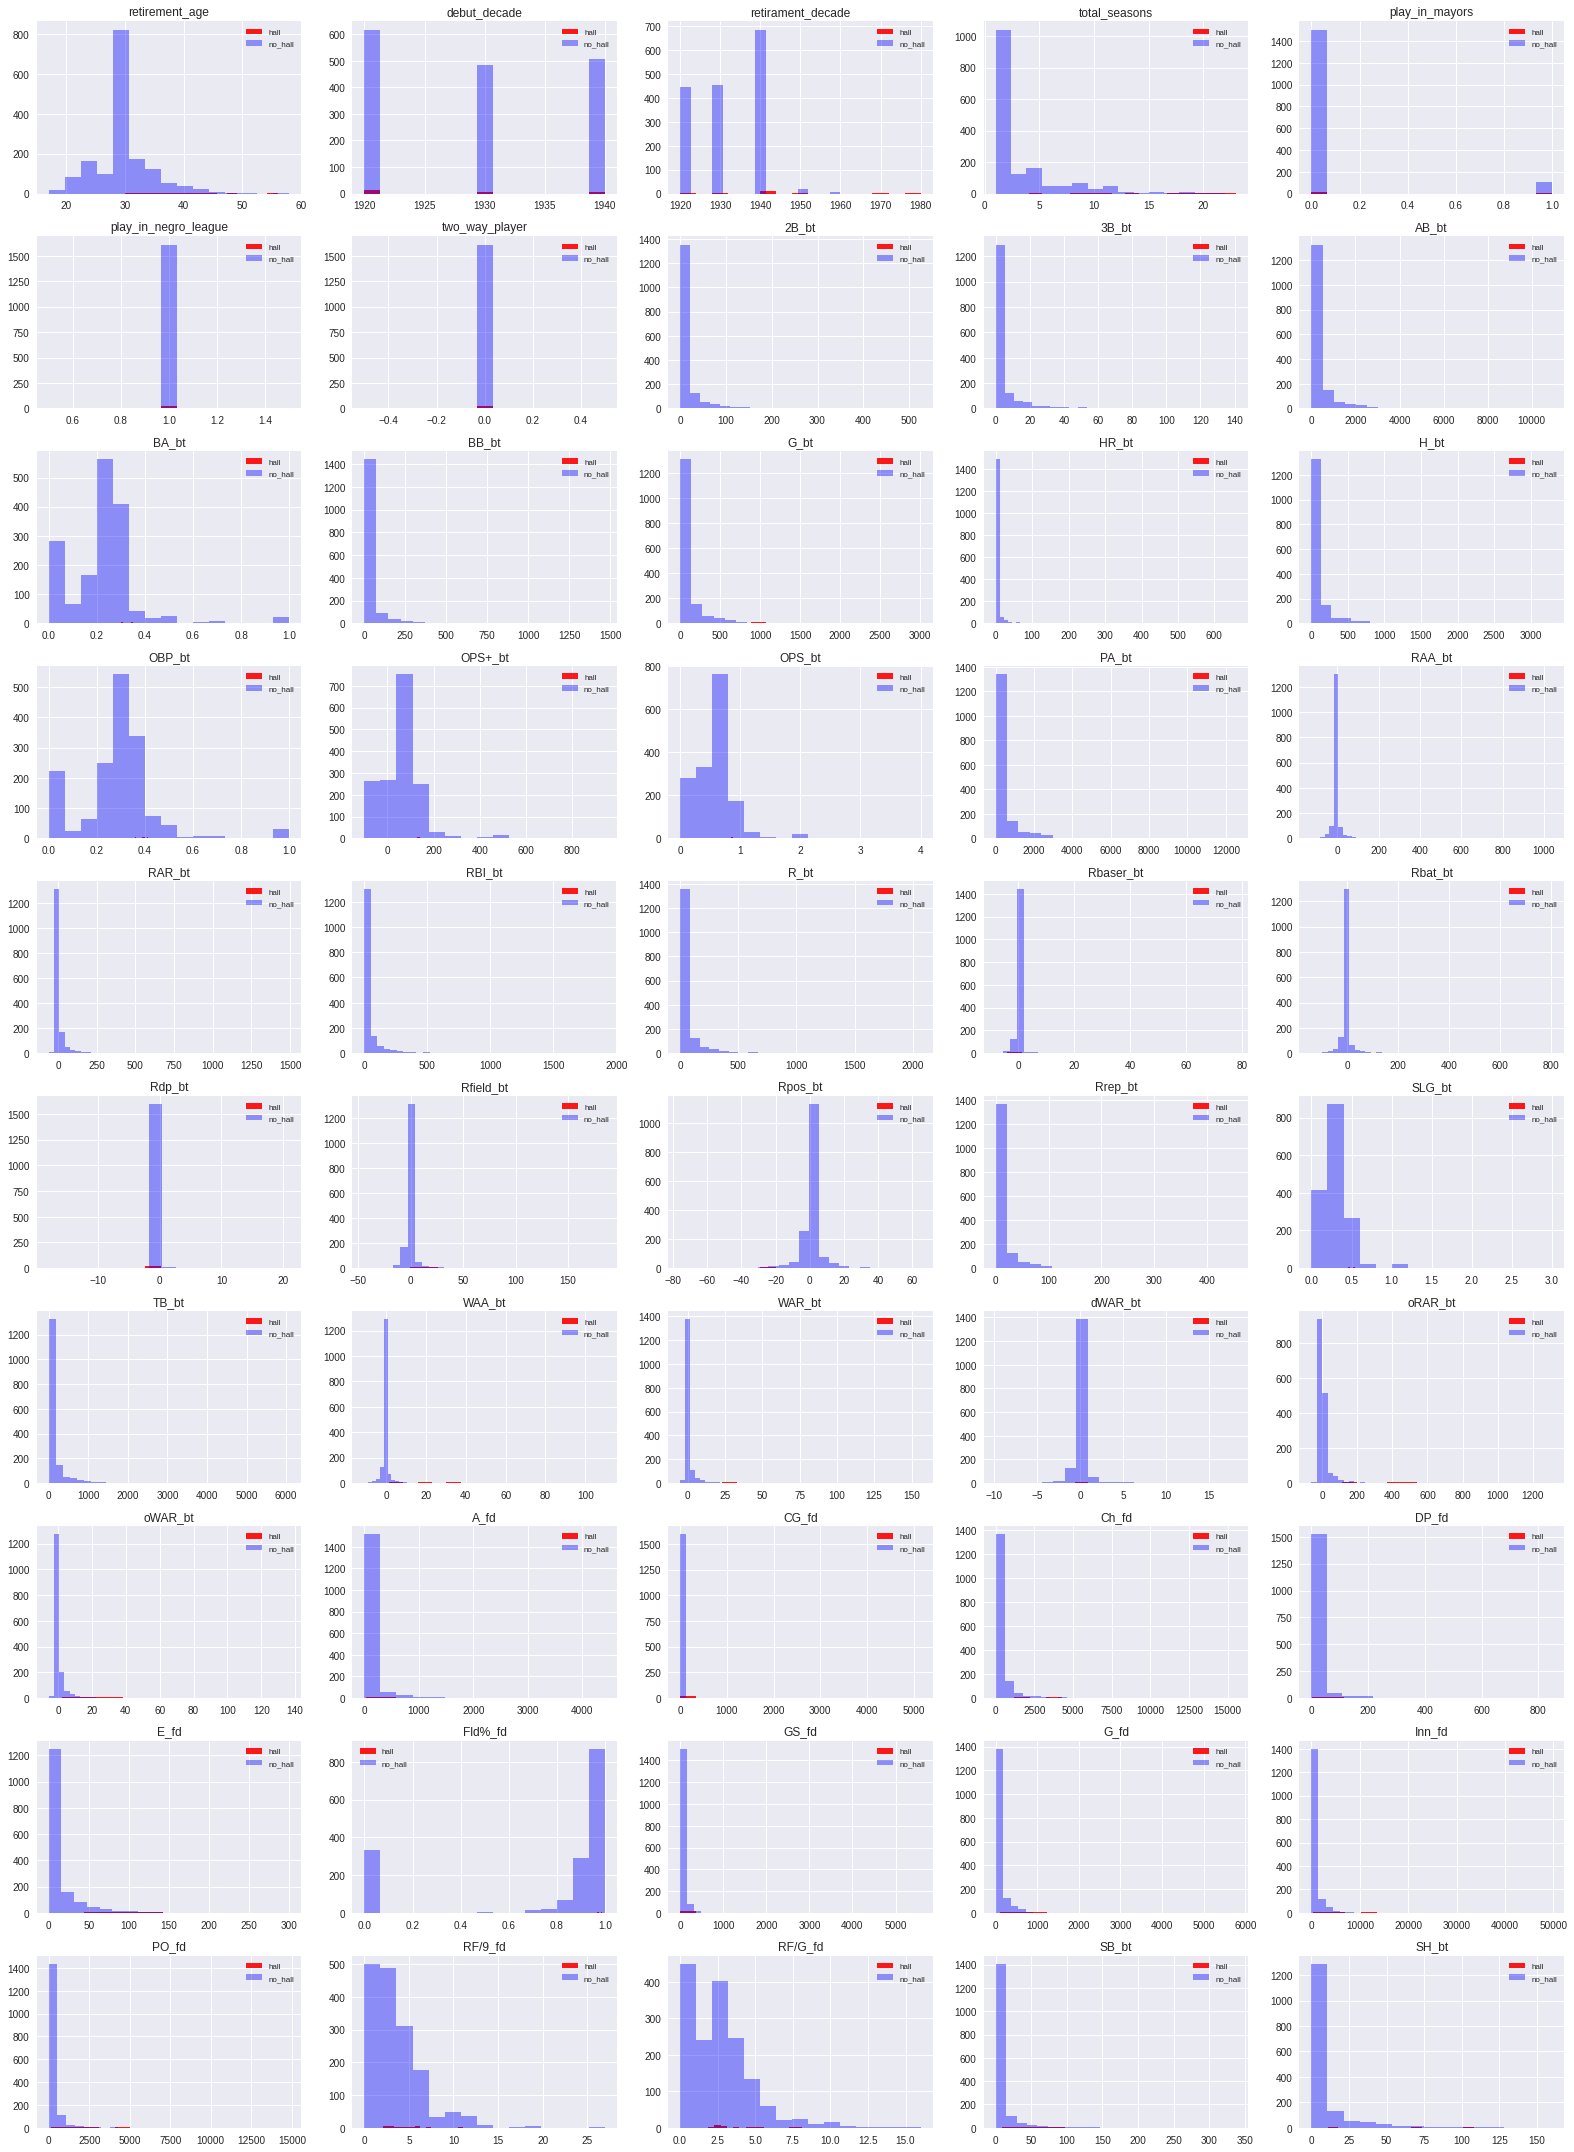

In [27]:
stats_bar_plot(hall, no_hall, sd_features[:-1], 10,5,(22,30))

In [28]:
def boxplot_generate(hall, no_hall, feature):
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 5))
    ax1.set_title("Hall")
    ax2.set_title("NoHall")
    hall.boxplot(feature, ax=ax1)
    no_hall.boxplot(feature, ax=ax2)
    plt.show()

def boxplot_per_feature(hall, no_hall, features):
    for feature in features:
        boxplot_generate(hall, no_hall, feature)

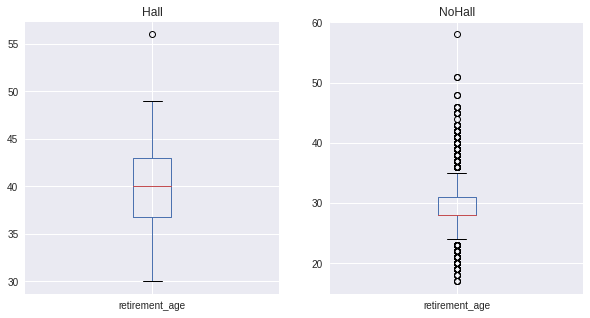

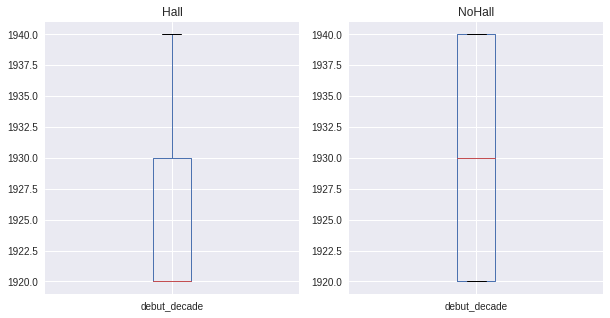

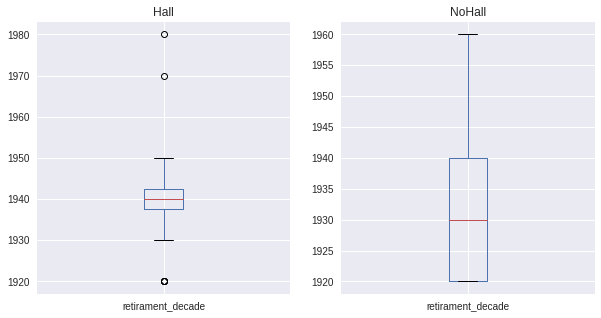

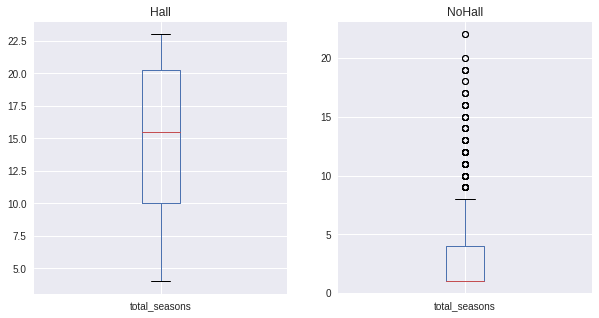

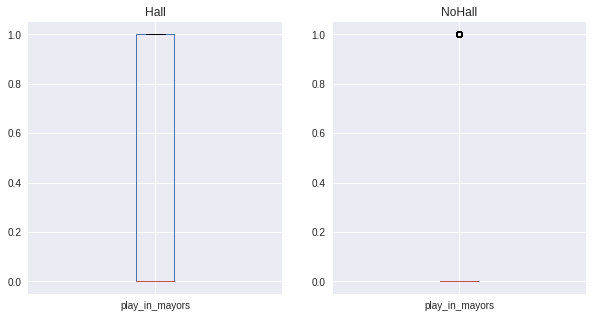

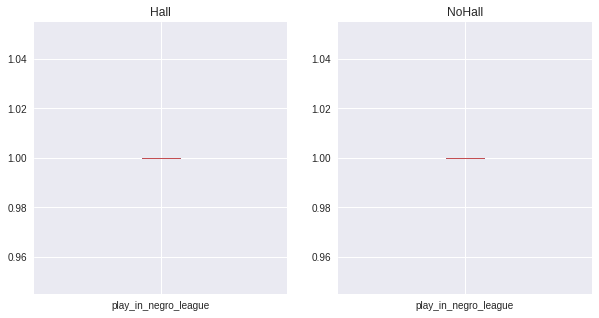

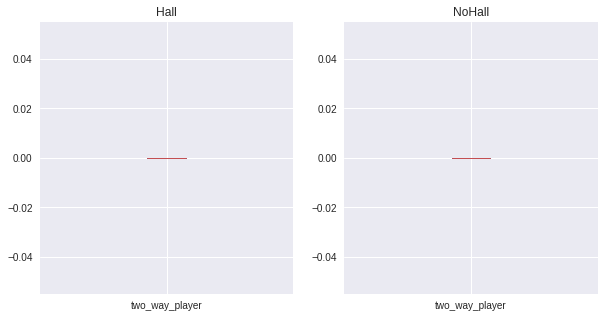

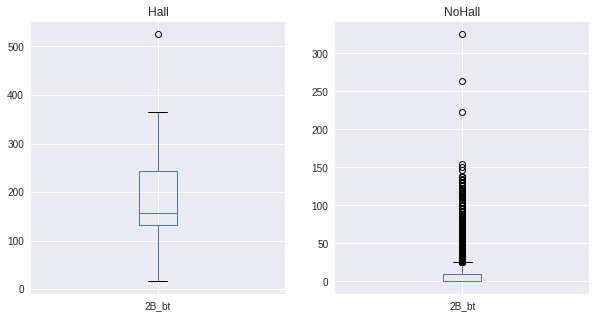

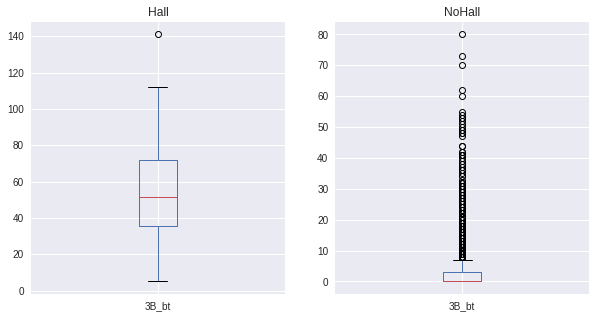

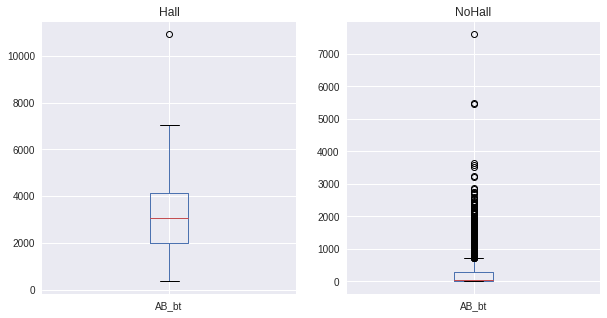

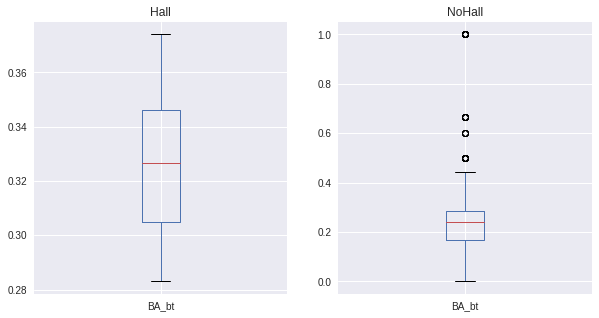

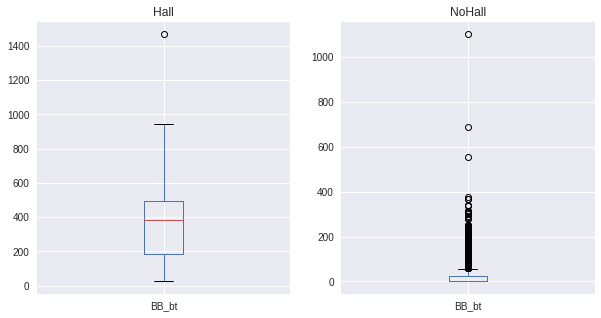

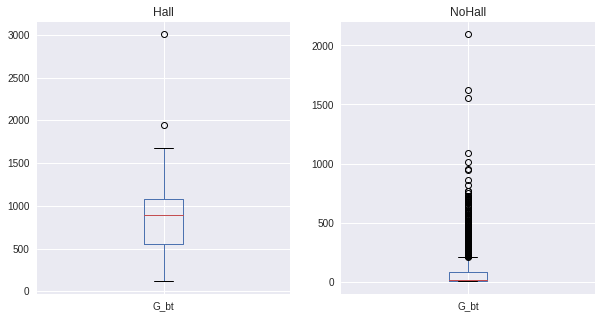

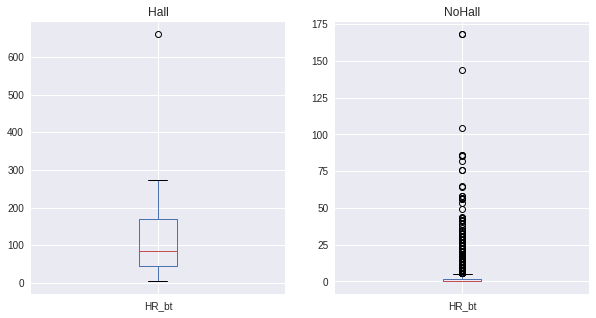

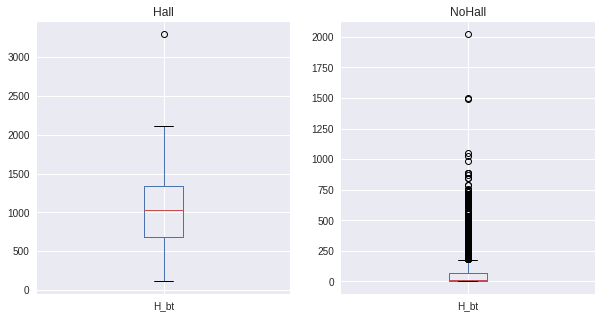

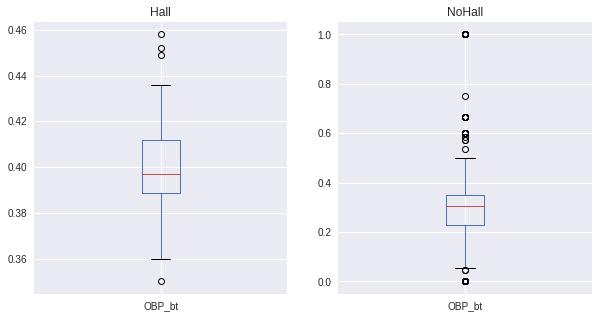

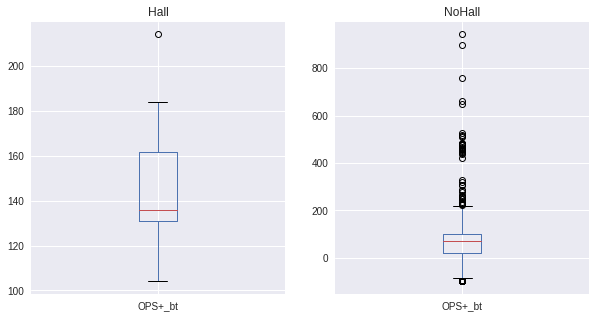

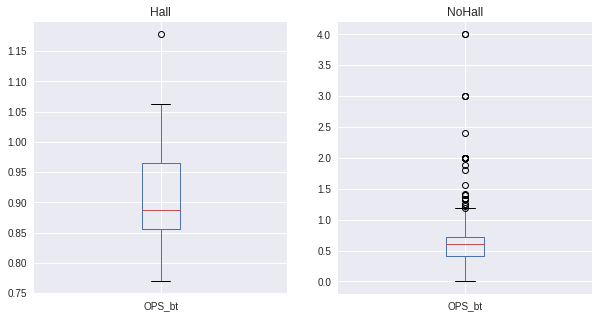

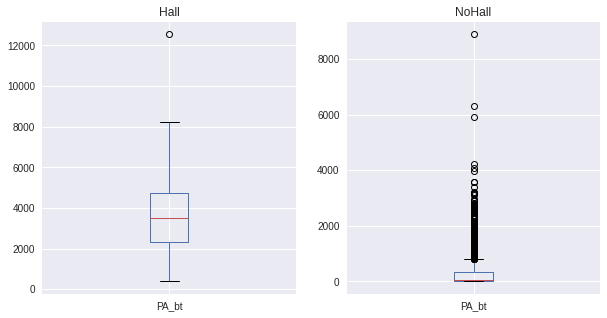

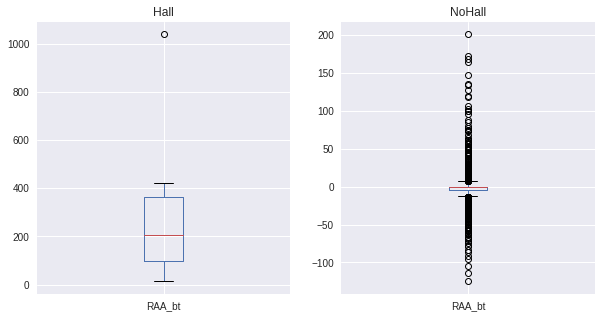

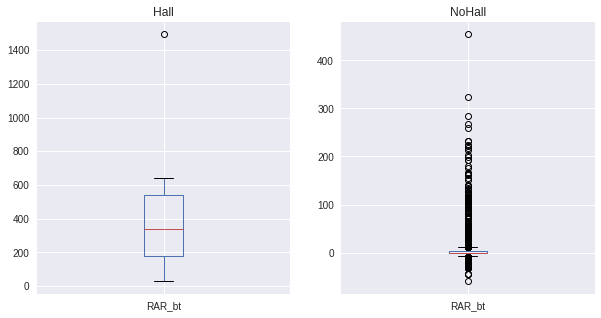

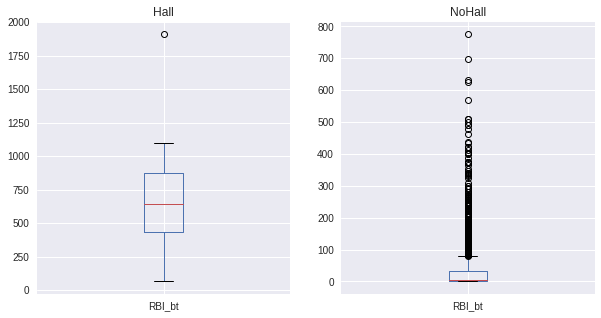

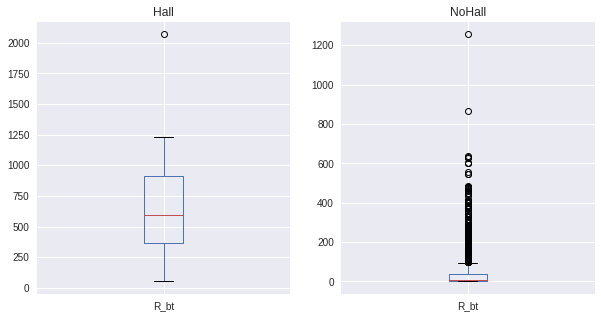

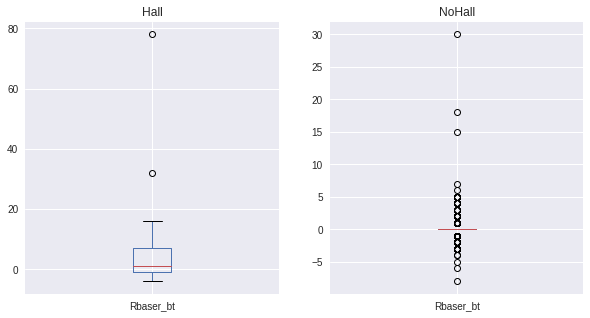

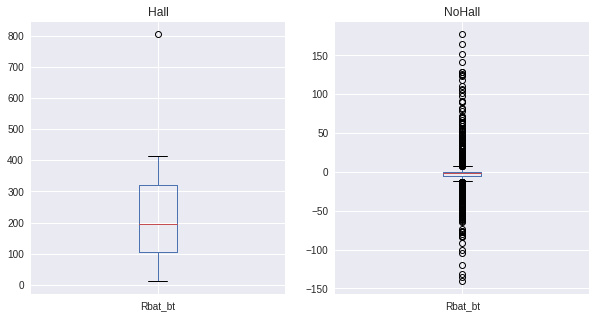

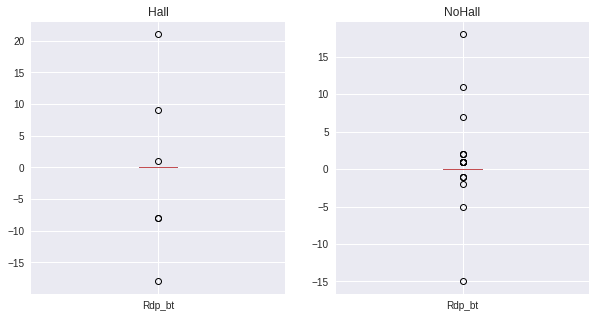

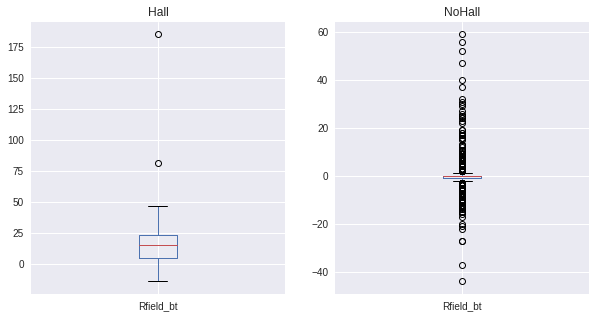

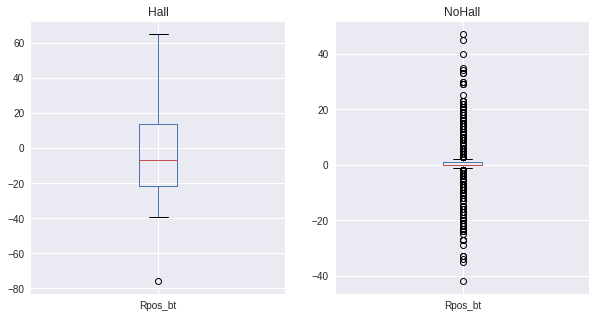

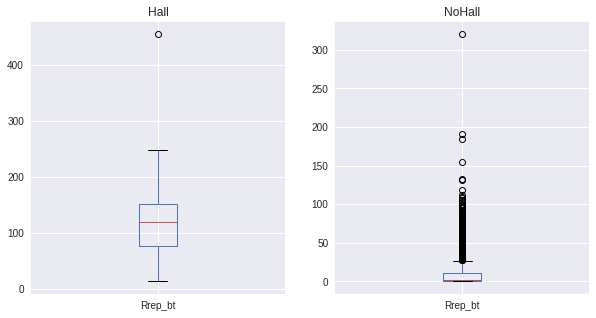

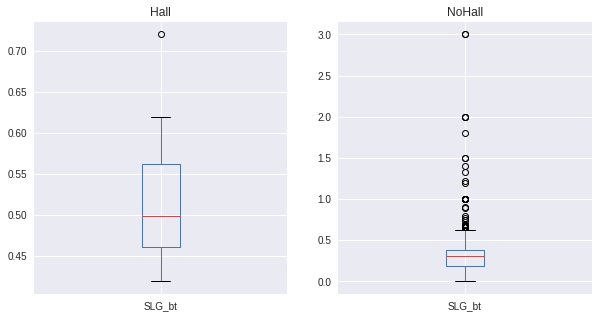

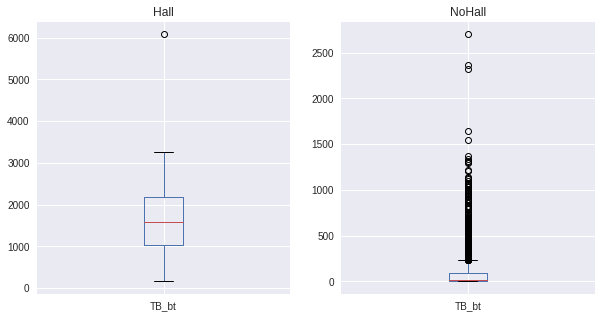

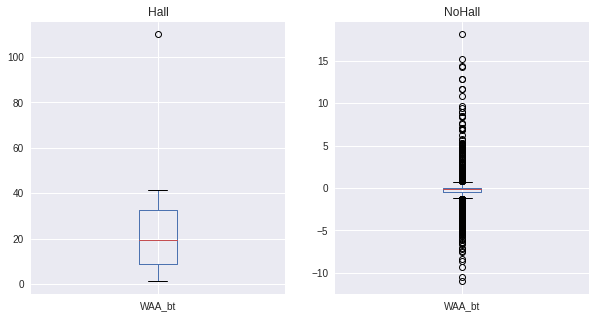

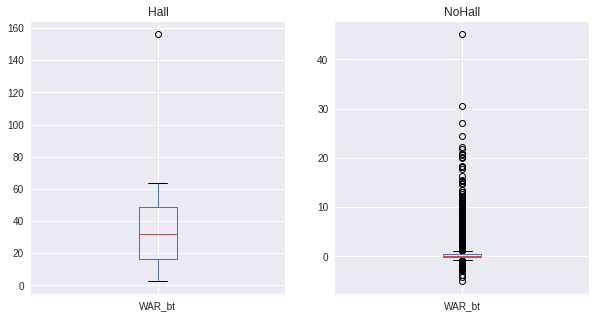

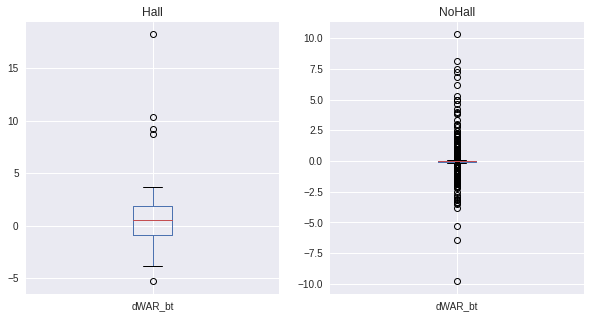

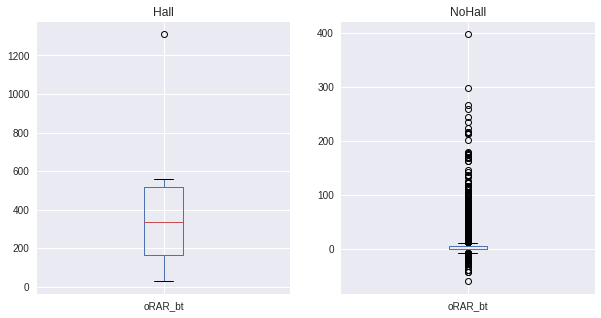

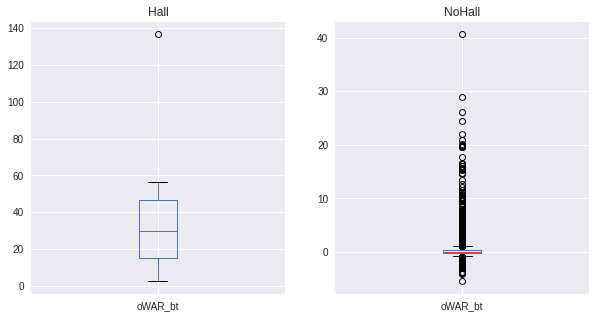

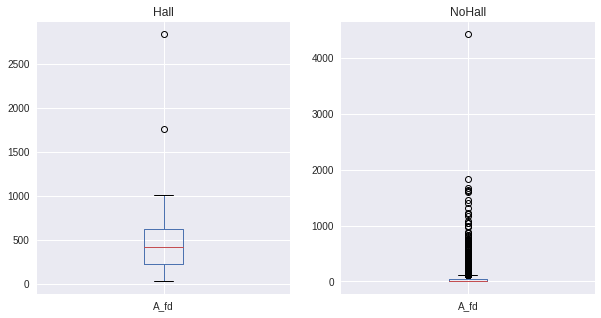

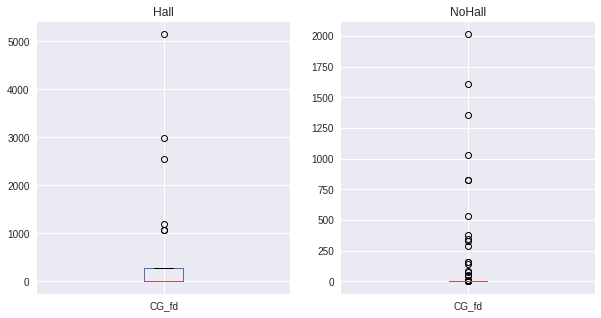

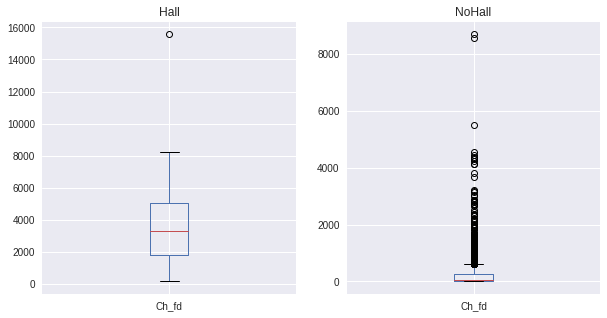

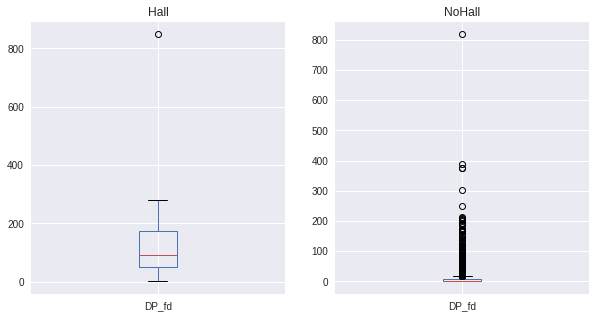

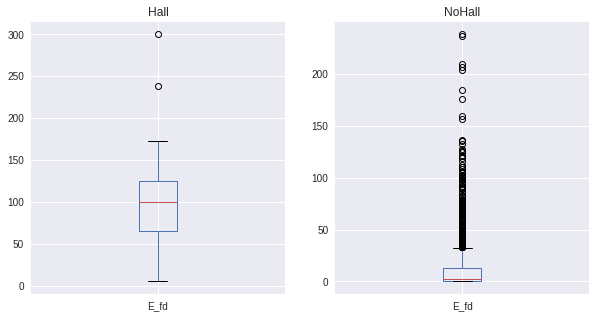

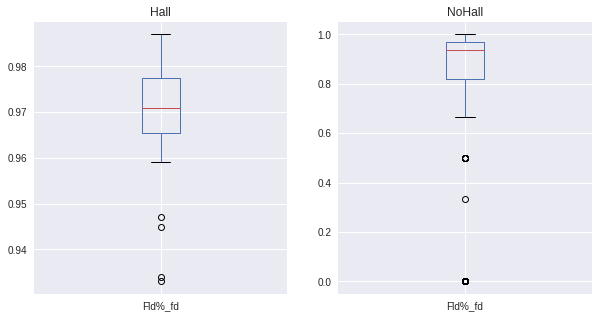

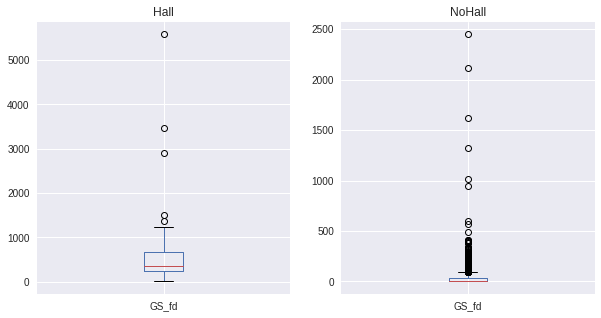

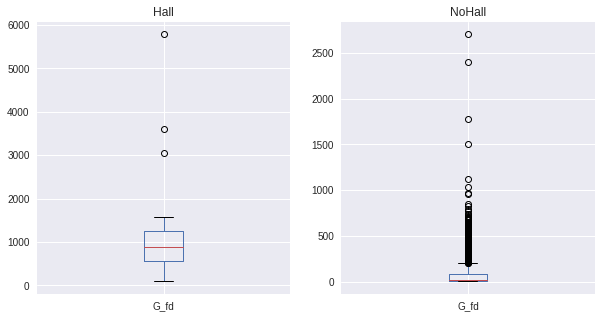

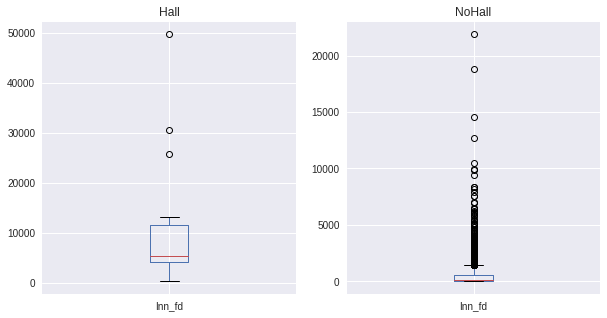

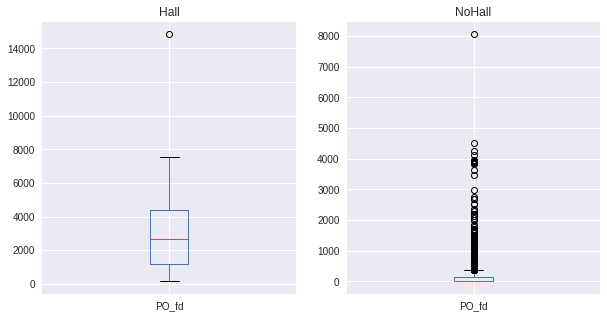

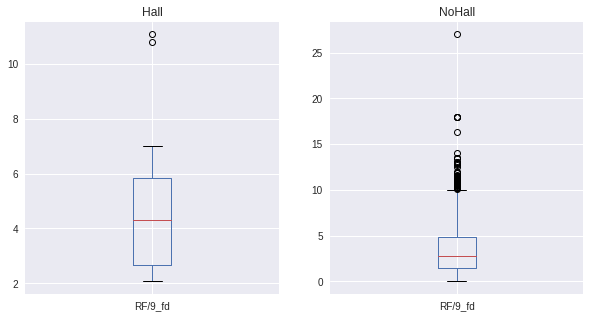

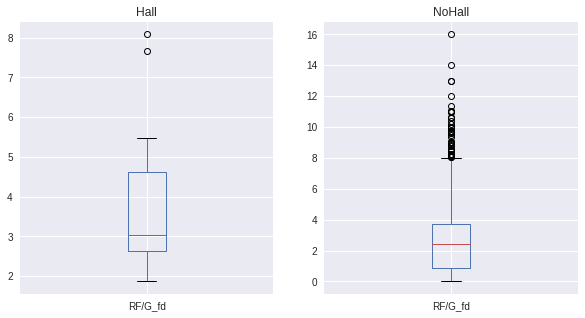

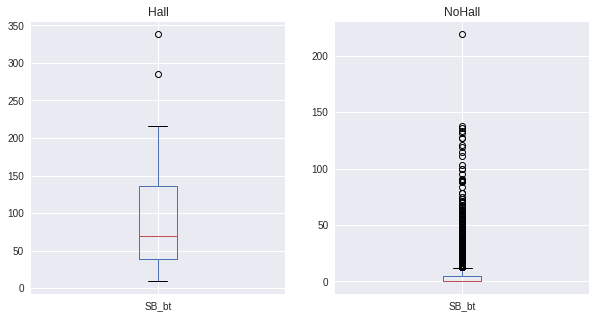

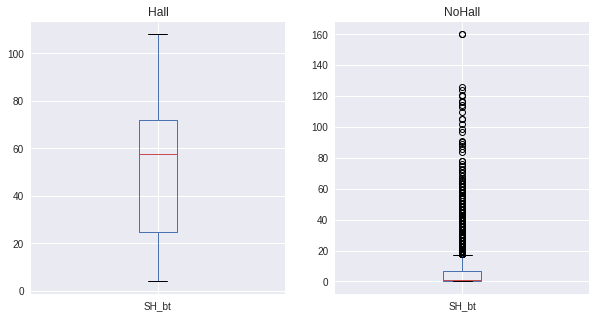

In [29]:
boxplot_per_feature(hall, no_hall, sd_features[:-1])

In [30]:
hall_threshold_cond={
    'total_seasons':5,
    'retirement_age':28,
    'G_bt':90,
    'BA_bt':0.2,
    'RAR_bt':1,
    'WAR_bt':1
}
negro_lg_bat_df = filter_dataset(negro_lg_bat_df, None, hall_threshold_cond, None, None)

In [31]:
negro_lg_bat_df.shape

(235, 51)

In [32]:
negro_lg_bat_df['HoF'].value_counts()

0    212
1     23
Name: HoF, dtype: int64

In [33]:
hall = X[X['HoF']==1]
no_hall = X[X['HoF']==0]

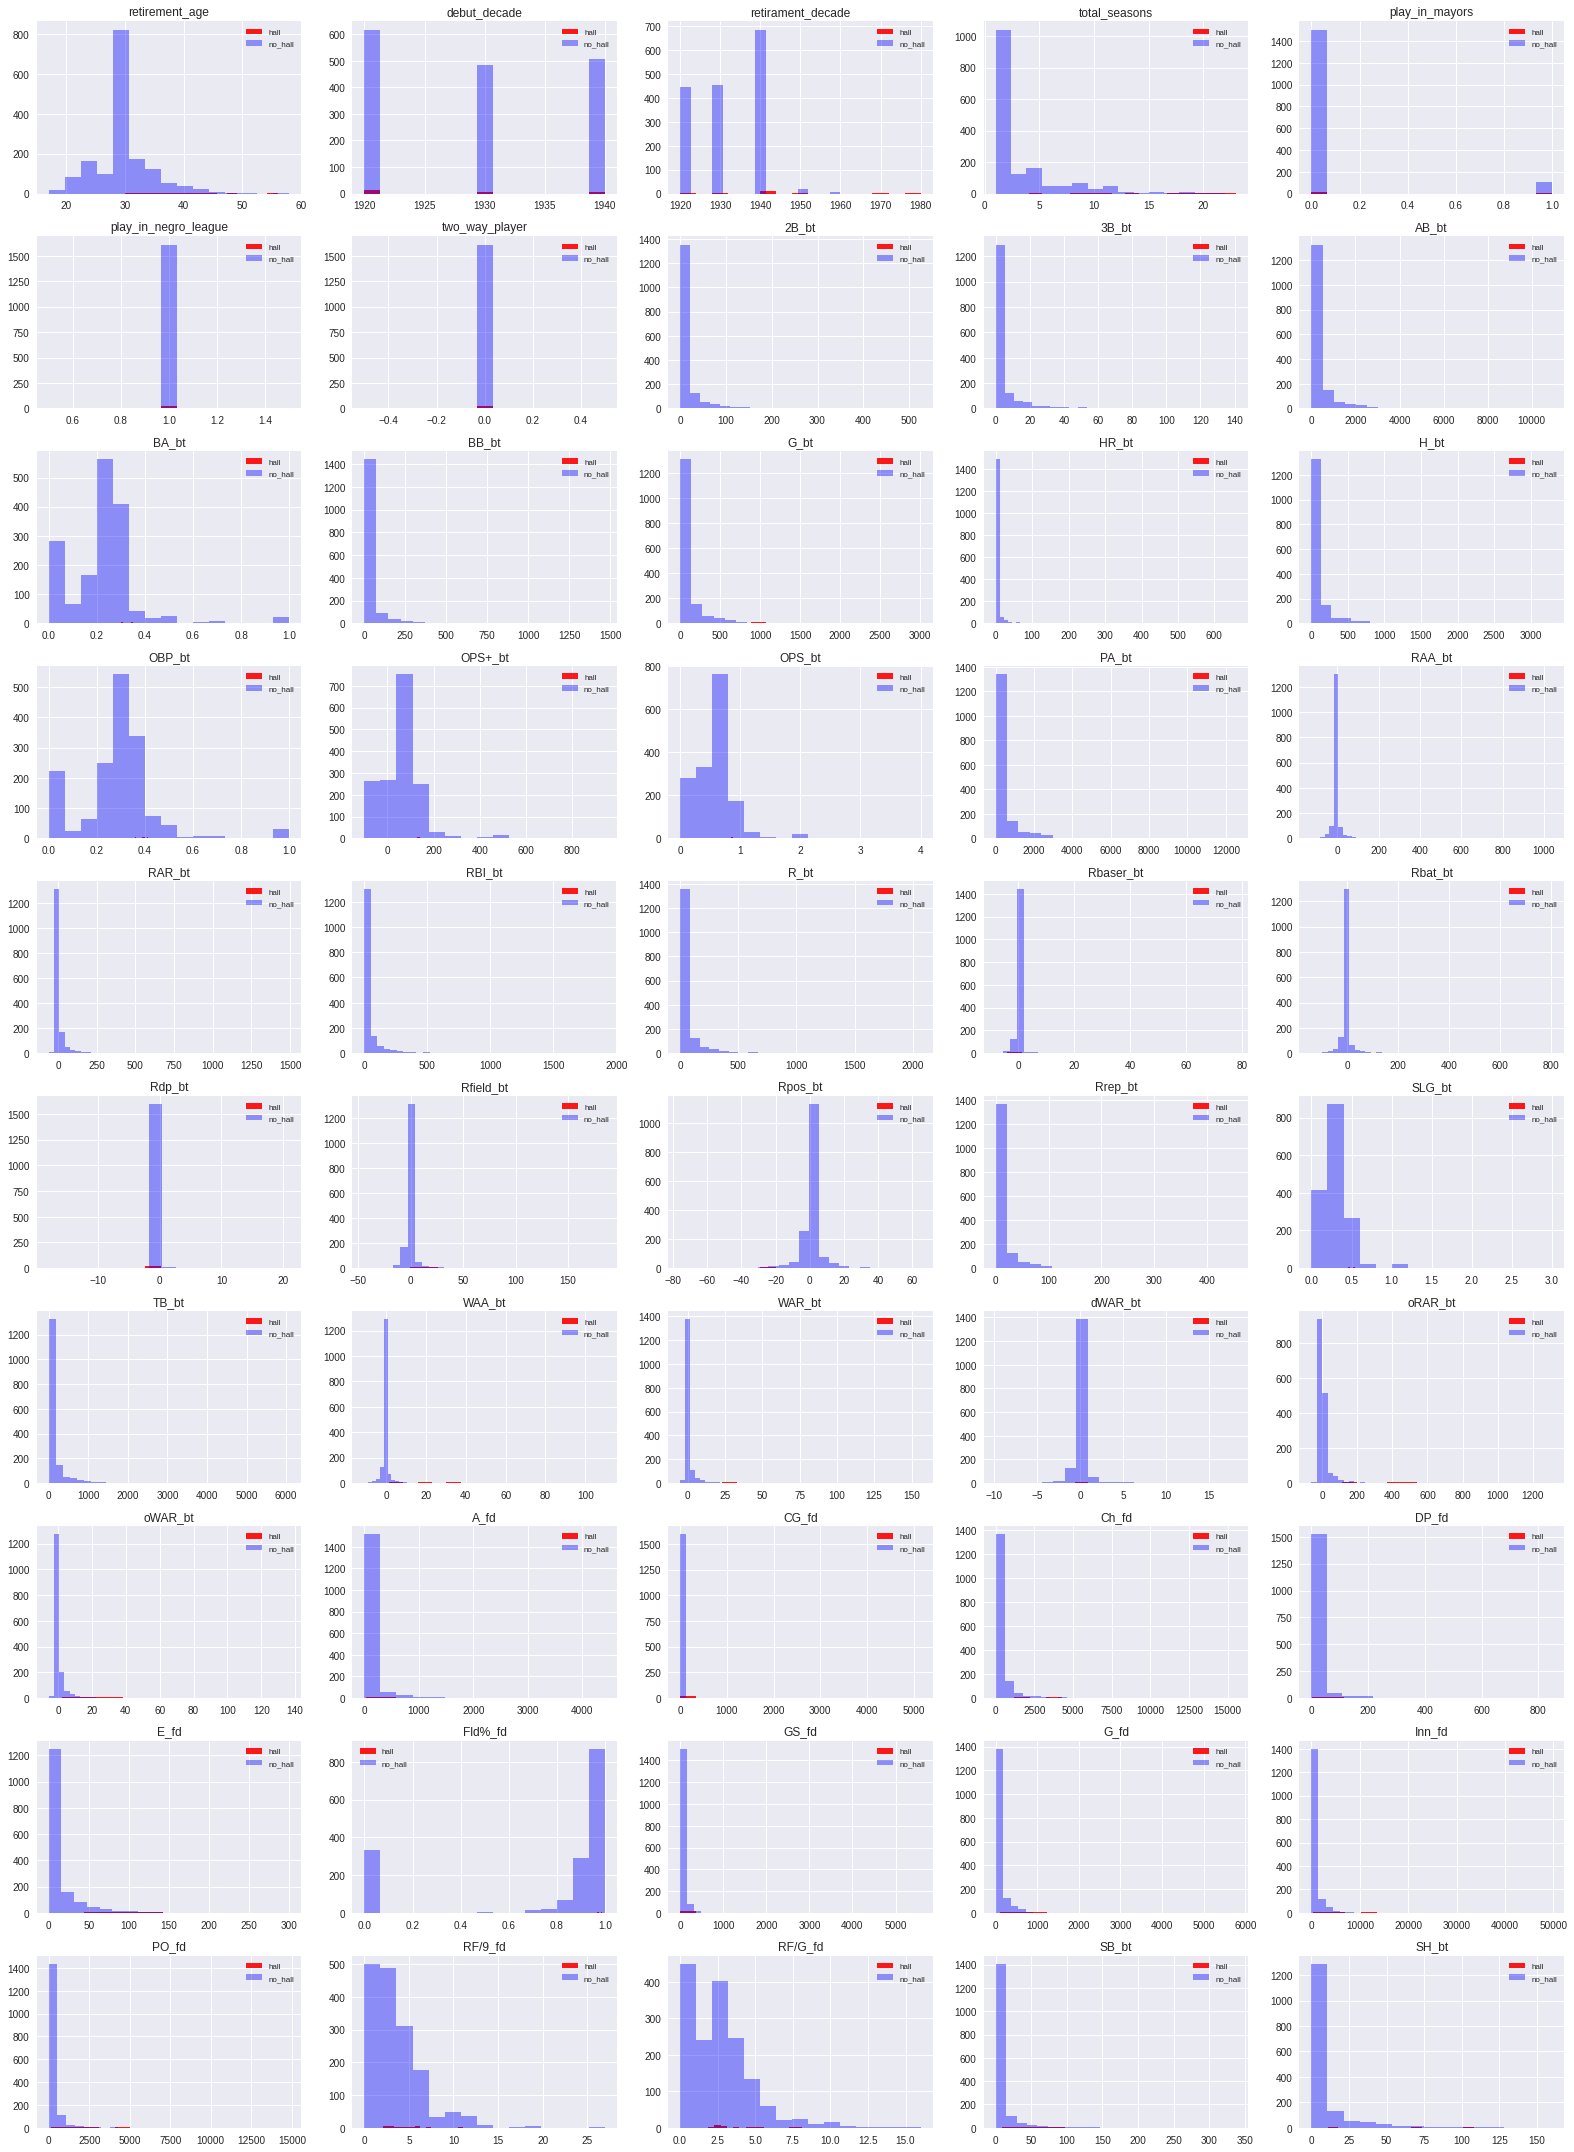

In [34]:
#stats_bar_plot(hall, no_hall, sd_features[:-1], 10,5,(22,30))

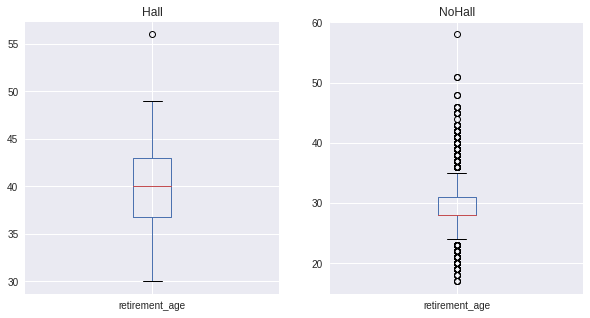

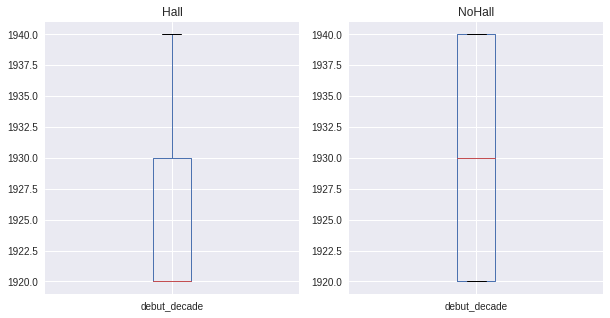

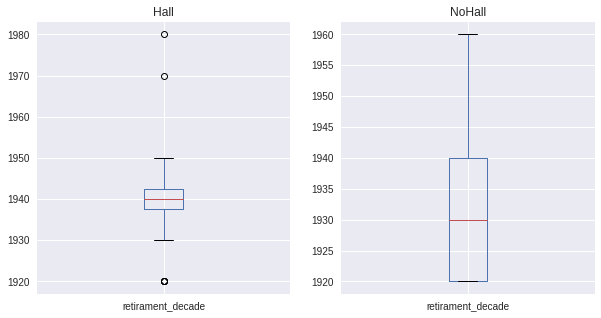

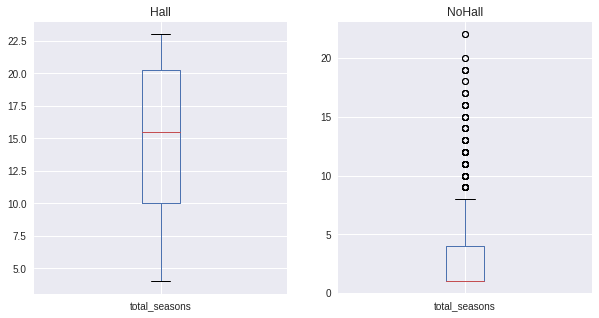

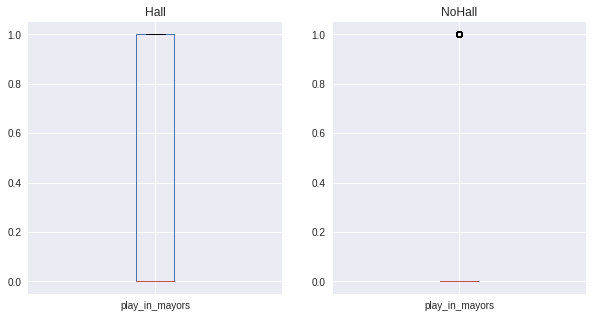

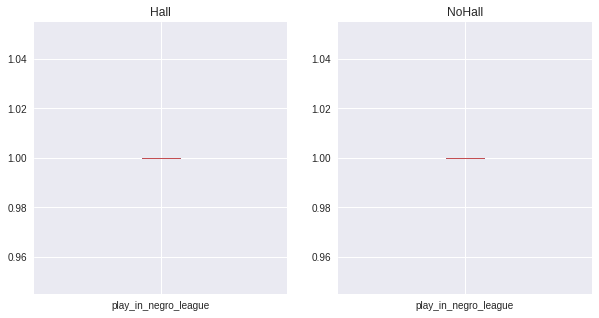

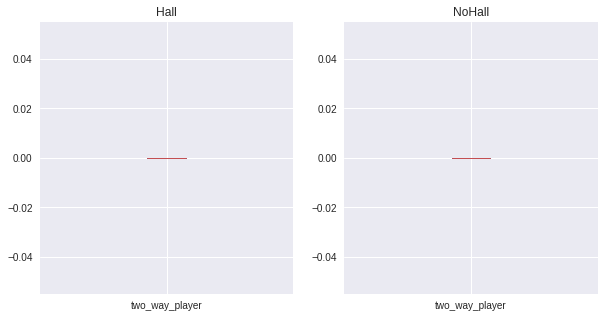

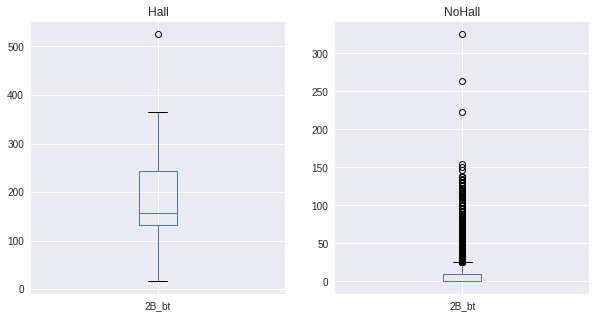

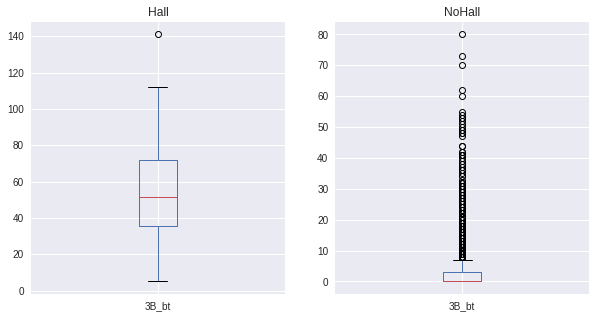

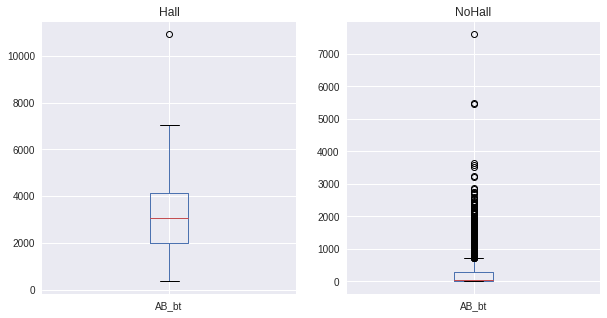

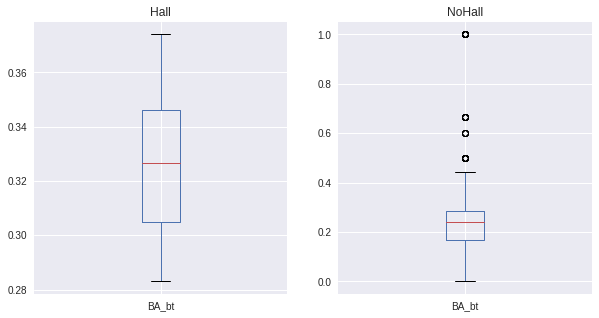

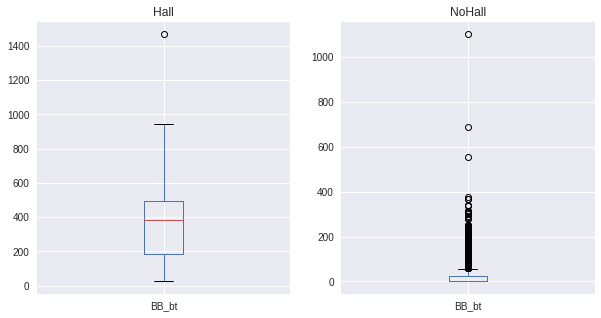

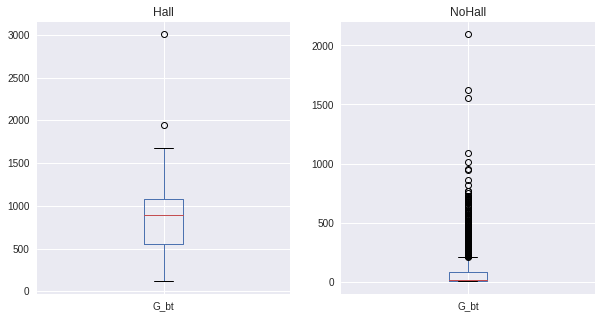

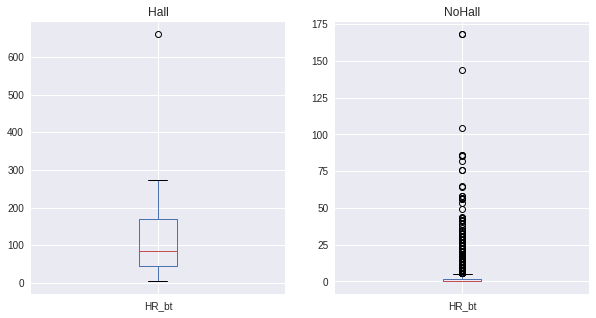

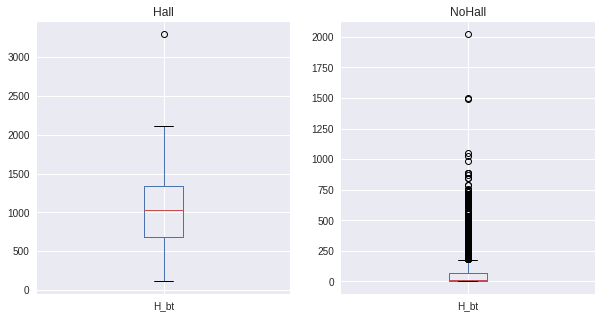

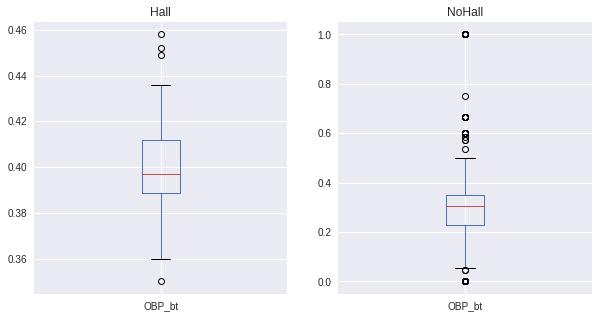

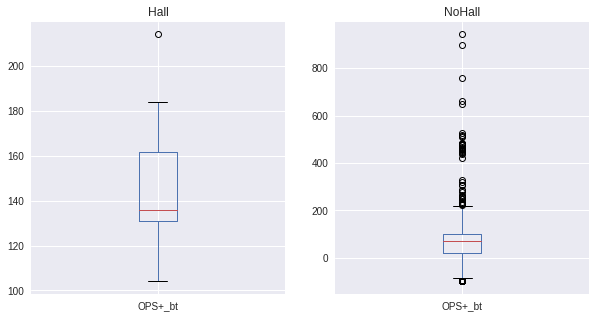

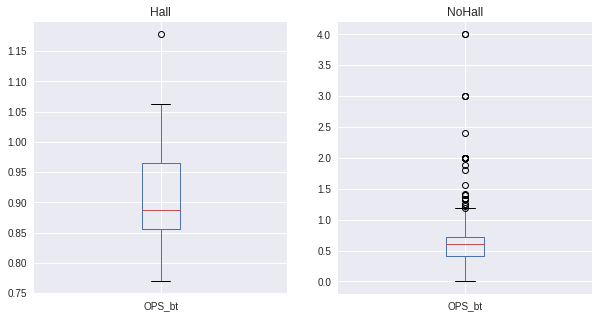

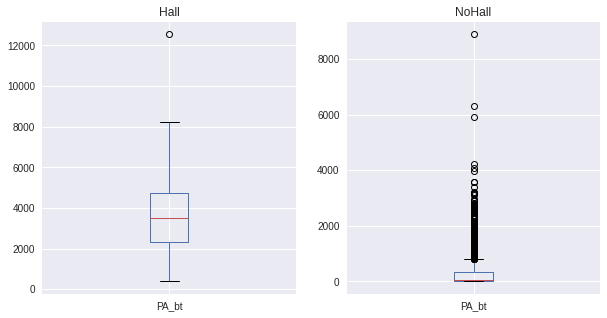

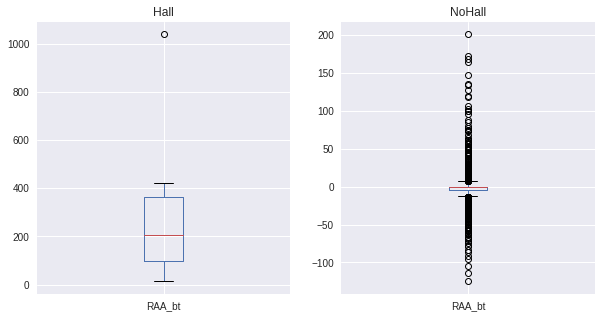

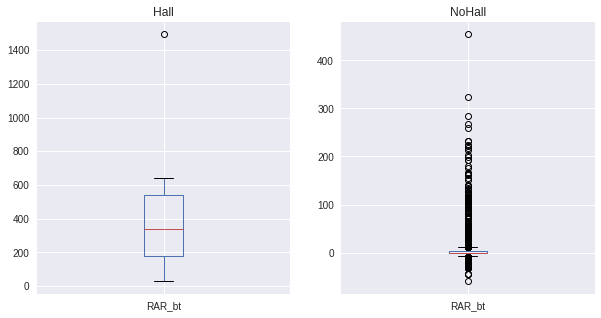

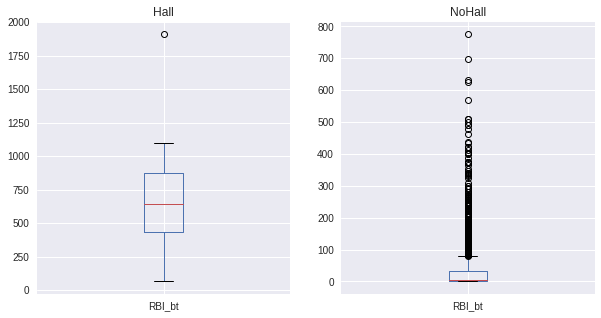

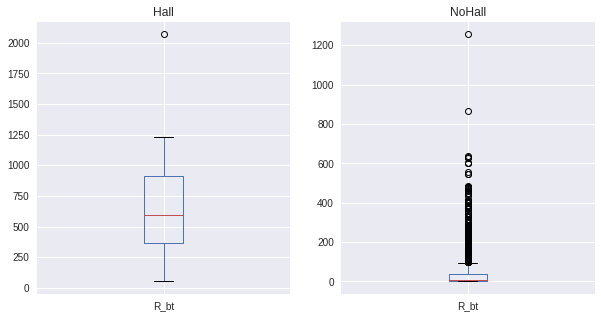

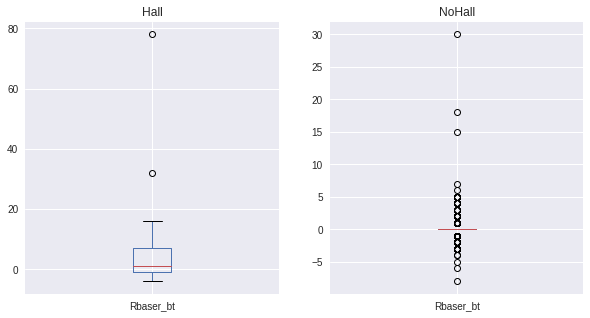

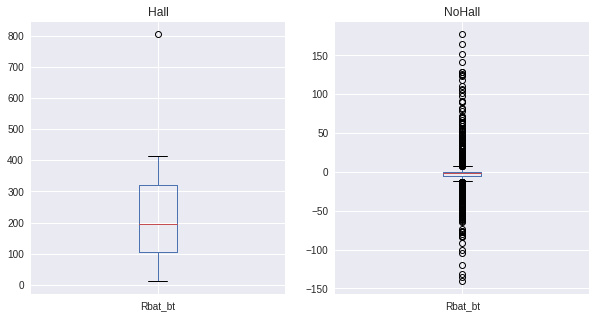

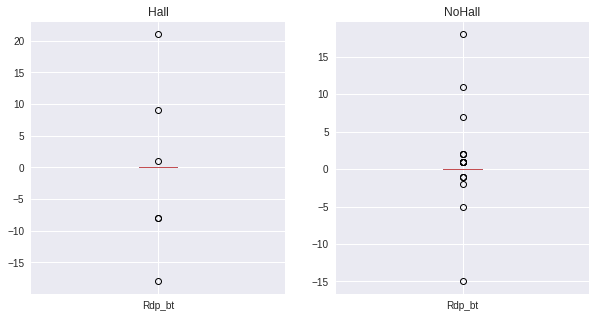

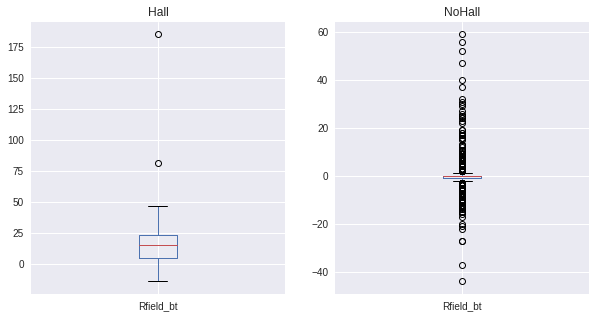

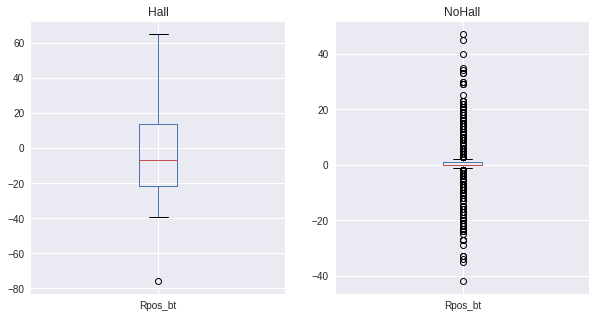

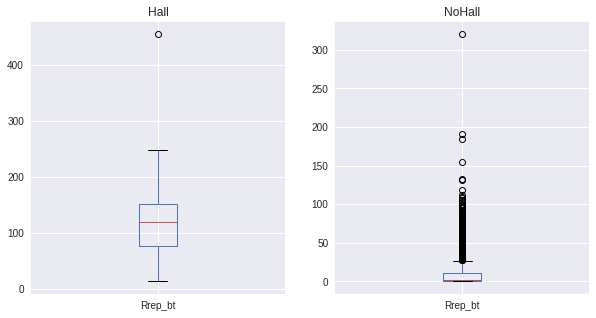

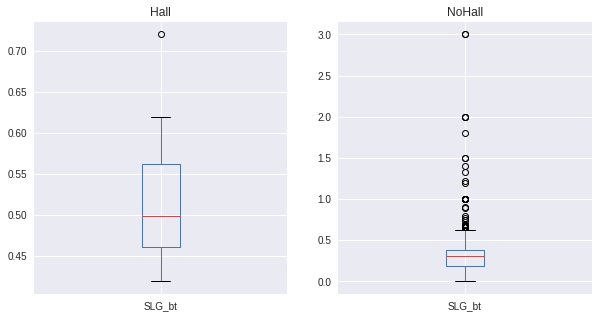

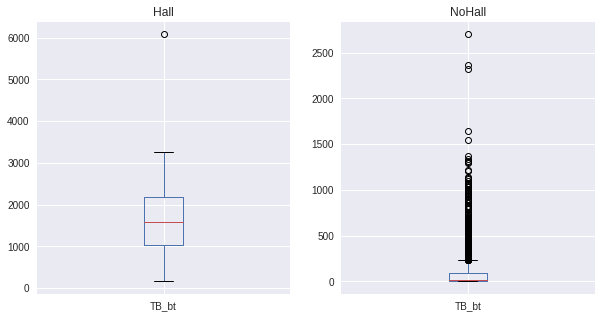

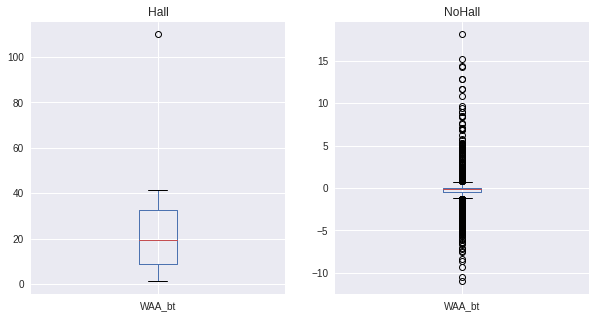

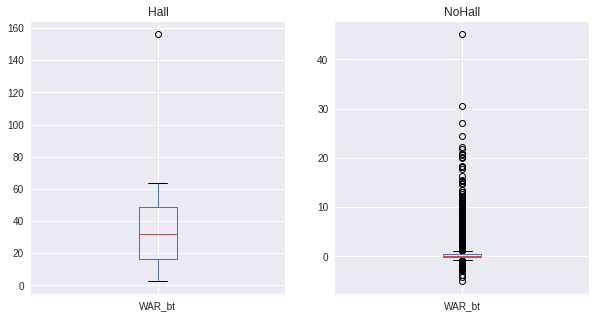

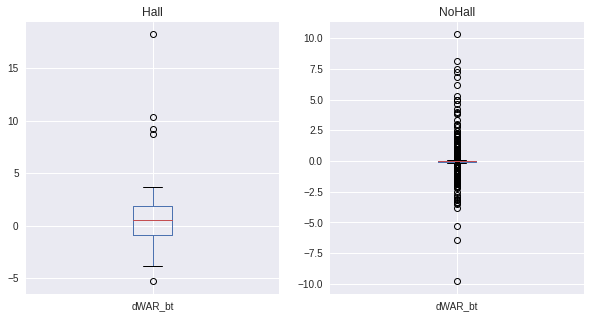

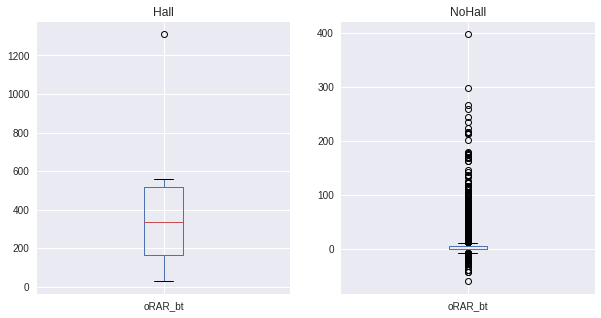

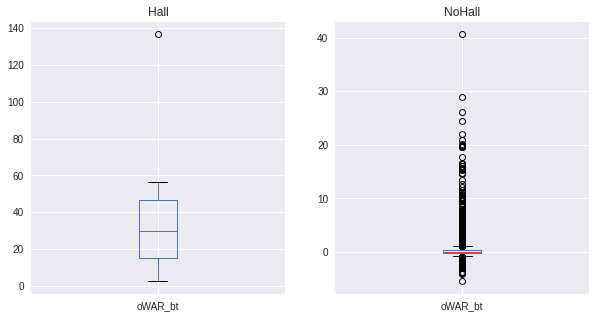

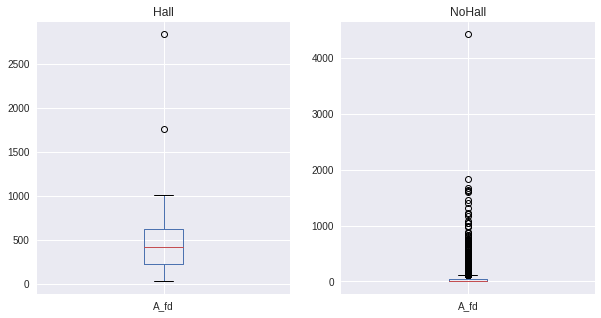

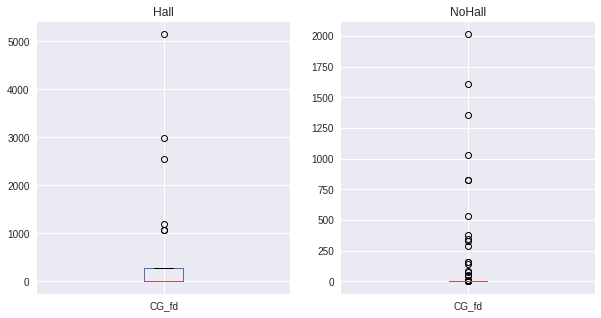

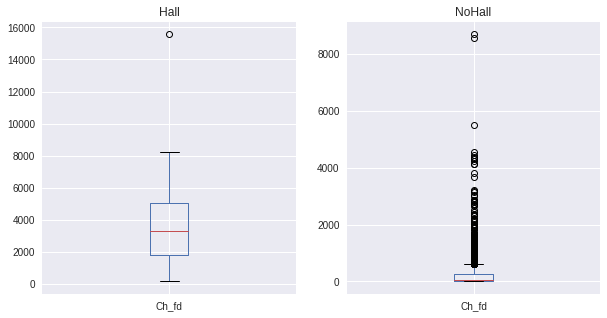

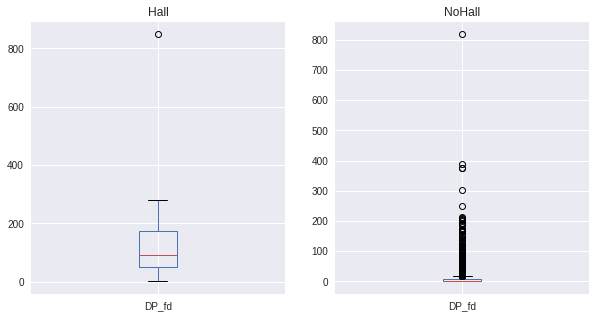

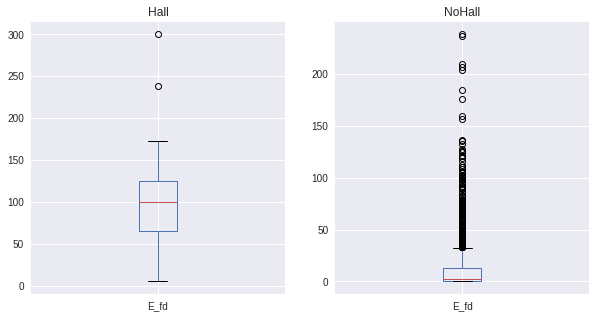

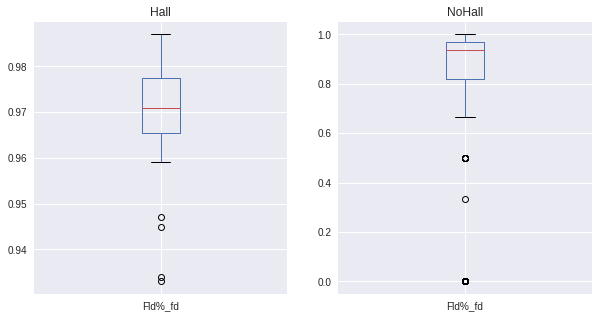

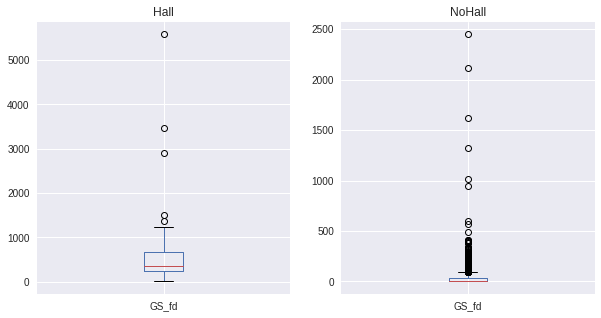

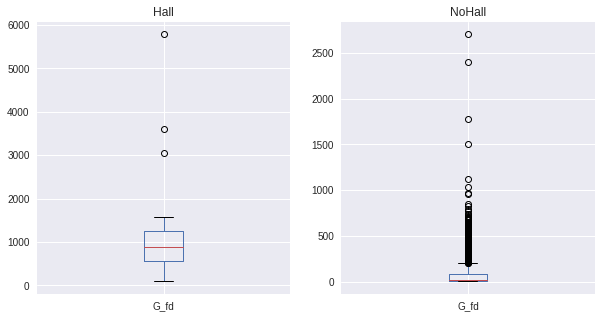

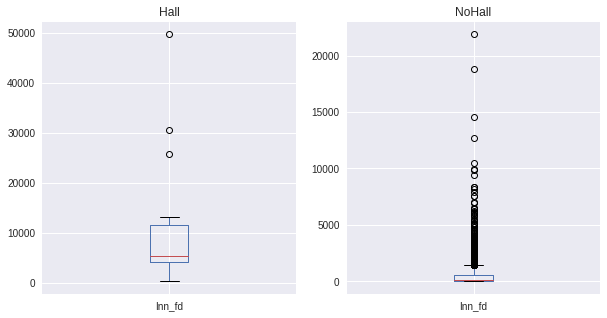

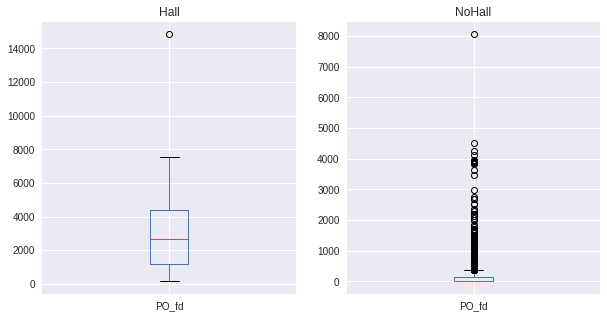

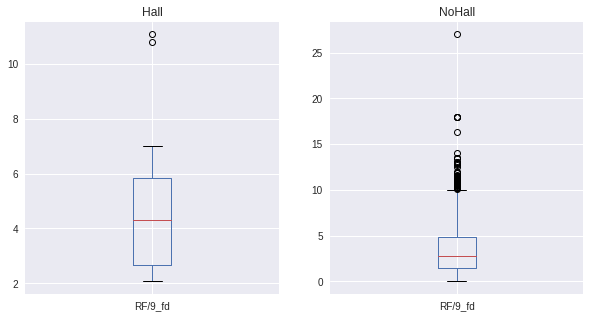

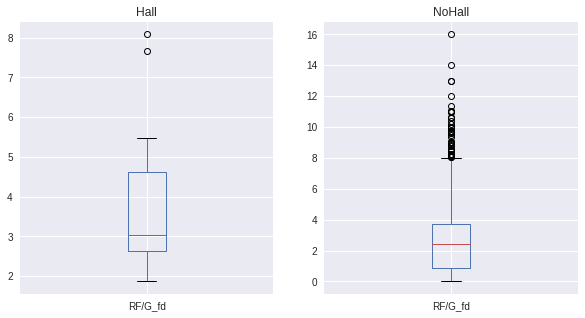

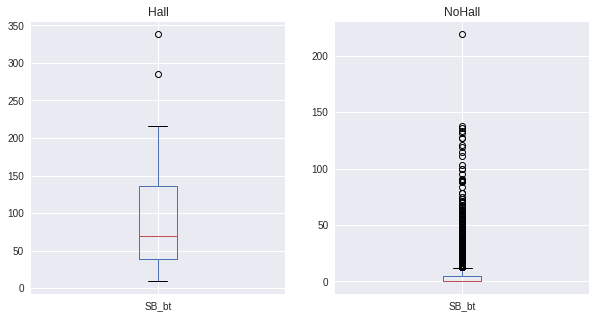

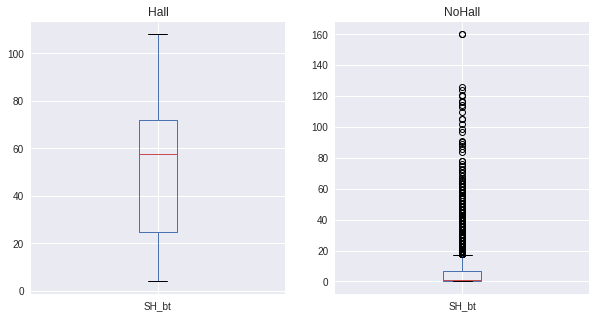

In [35]:
#boxplot_per_feature(hall, no_hall, sd_features[:-1])

In [36]:
features_base = ['retirement_age', 'total_seasons', '2B_bt', '3B_bt', 'BA_bt', 'AB_bt', 'G_bt', 'HR_bt','H_bt', 'SLG_bt', 'OBP_bt',
'R_bt', 'Fld%_fd', 'RBI_bt', 'RAR_bt', 'WAR_bt']

In [37]:
X = select_features(negro_lg_bat_df, features_base)
y = select_features(negro_lg_bat_df, ['HoF'])

In [187]:
X.shape

(235, 16)

In [38]:
X.describe()

,retirement_age,total_seasons,2B_bt,3B_bt,BA_bt,AB_bt,G_bt,HR_bt,H_bt,SLG_bt,OBP_bt,R_bt,Fld%_fd,RBI_bt,RAR_bt,WAR_bt
count,235.000000,235.000000,235.00000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000
mean,35.668085,10.178723,73.12766,24.336170,0.291830,1566.476596,442.455319,30.638298,462.936170,0.414302,0.357774,273.565957,0.953715,247.323404,100.778723,9.460851
std,5.249384,4.186105,66.48720,19.839144,0.028323,1300.267357,359.357298,59.145852,391.171209,0.068843,0.032007,247.205473,0.020570,231.274206,147.402619,14.463479
min,28.000000,5.000000,6.00000,1.000000,0.230000,274.000000,94.000000,0.000000,77.000000,0.271000,0.289000,33.000000,0.870000,31.000000,8.000000,1.000000
25%,32.000000,7.000000,30.00000,11.000000,0.273000,719.500000,213.500000,5.000000,203.500000,0.366000,0.338000,114.500000,0.940000,93.500000,23.000000,2.200000
50%,35.000000,9.000000,55.00000,18.000000,0.290000,1210.000000,356.000000,13.000000,349.000000,0.407000,0.353000,206.000000,0.953000,177.000000,54.000000,5.000000
75%,38.500000,12.000000,92.00000,31.500000,0.308500,2042.000000,558.500000,29.500000,612.000000,0.457500,0.376500,353.000000,0.970000,309.000000,114.000000,10.650000
max,58.000000,23.000000,525.00000,141.000000,0.374000,10924.000000,3005.000000,660.000000,3293.000000,0.720000,0.462000,2068.000000,0.990000,1909.000000,1494.000000,156.100000


In [42]:
y.describe()

,HoF
count,235.000000
mean,0.097872
std,0.297776
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [63]:
def plot_3d_data(X_r, y, figsize=(16,16), colors=('r','b'), d1=False):
    fig = plt.figure(figsize=figsize)
    ax1 = fig.add_subplot(111, projection='3d')
    for i in range(len(y)):
        _y = y[i] if d1 else y[i][0]
        if _y == 1:
            ax1.scatter(X_r[i,0], X_r[i,1], X_r[i,2], c=colors[0], marker='o')
        else:
            ax1.scatter(X_r[i,0], X_r[i,1], X_r[i,2], c=colors[1], marker='o')
    ax1.set_xlabel = '1st Component'
    ax1.set_ylabel = '2nd Component'
    ax1.set_zlabel = '3rd Component'
    plt.show()

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [41]:
X_sc = StandardScaler().fit_transform(X)

In [49]:
pca3 = PCA(n_components=3)
X_red3 =  pca3.fit_transform(X_sc)


In [50]:
print('explained variance ratio (for components): %s'%str(pca3.explained_variance_ratio_))

explained variance ratio (for components): [0.6538538  0.13794704 0.06999607]


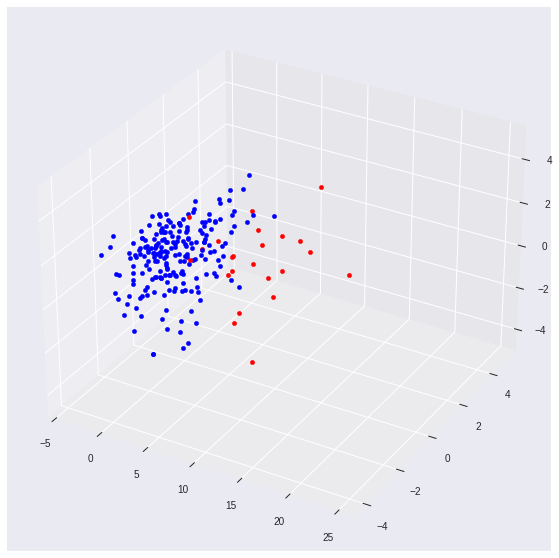

In [51]:
plot_3d_data(X_red3, y.to_numpy(), (10,10))

In [101]:
from sklearn.cluster import KMeans, AgglomerativeClustering 

In [84]:
kmeans = KMeans(n_clusters=2,
                n_init=10,
                init='random',
                tol=1e-4, 
                random_state=17,
                verbose=True).fit(X_red3)

Initialization complete
Iteration 0, inertia 3737.5334283905
Iteration 1, inertia 2911.3655005101227
Iteration 2, inertia 2716.969803296949
Iteration 3, inertia 2168.719352087339
Iteration 4, inertia 1924.796905364385
Iteration 5, inertia 1872.5979076189699
Iteration 6, inertia 1851.394572819094
Iteration 7, inertia 1832.669739581635
Iteration 8, inertia 1824.111932695461
Iteration 9, inertia 1815.2374958199543
Iteration 10, inertia 1808.778172593076
Iteration 11, inertia 1795.3871857165561
Iteration 12, inertia 1785.3163118088794
Iteration 13, inertia 1779.7737354162039
Iteration 14, inertia 1775.7934446807792
Iteration 15, inertia 1774.4872494044737
Converged at iteration 15: strict convergence.
Initialization complete
Iteration 0, inertia 3935.1714003794514
Iteration 1, inertia 3019.0777700207045
Iteration 2, inertia 2933.214948884376
Iteration 3, inertia 2608.3876457203764
Iteration 4, inertia 1994.1363031182277
Iteration 5, inertia 1862.124001231681
Iteration 6, inertia 1842.01431

In [107]:
k_labels = kmeans.labels_
k_labels

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

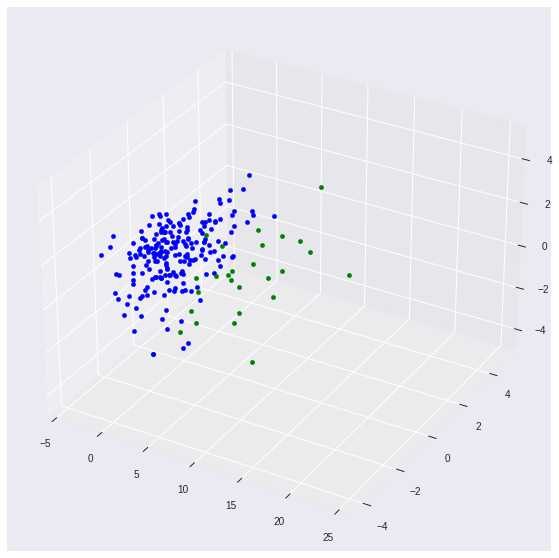

In [86]:
plot_3d_data(X_red3, k_labels, (10,10), ('g', 'b'), True)

In [96]:
from sklearn import metrics 

In [87]:
values = y['HoF'].values

In [68]:
values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [126]:
selected_index = {}

In [127]:
def agregate_to_selected_index(indexs):
    for idx in indexs:
        if selected_index.get(idx)!= None:
            selected_index[idx]+=1
        else:
            selected_index[idx] = 1

In [108]:
def compute_matrix(values, labels):
    idx_0_0 = []
    idx_0_1 = []
    idx_1_0 = []
    idx_1_1 = []
    matrix = [[0,0],[0,0]]
    for i in range(len(values)):
        matrix[values[i]][labels[i]]+=1
        if values[i] and labels[i]:
            idx_1_1.append(i)
        elif values[i]:
            idx_1_0.append(i)
        elif labels[i]:
            idx_0_1.append(i)
        else:
            idx_0_0.append(i)
    return matrix, idx_0_0, idx_0_1, idx_1_0, idx_1_1

In [114]:
def print_matrix(matrix):
    print(f"T 0|  {matrix[0][0]}   {matrix[0][1]}")
    print(f"R  |   ")
    print(f"U 1|  {matrix[1][0]}   {matrix[1][1]}")
    print(f"E  |  0     1")
    print(f"        Groups")
    

In [109]:
from pprint import pprint

km2_3_matrix, km2_3_idx_0_0, km2_3_idx_0_1, km2_3_idx_1_0, km2_3_idx_1_1 = compute_matrix(values, k_labels)

In [115]:
print(km2_3_matrix)

[[202, 10], [7, 16]]


In [116]:
print_matrix(km2_3_matrix)

T 0|  202   10
R  |   
U 1|  7   16
E  |  0     1
        Groups


In [128]:
agregate_to_selected_index(km2_3_idx_0_1)

In [118]:
def scores(values, labels, X):
    print("Homogeneity_score: ", metrics.homogeneity_score(values, labels))
    print("Completeness_score: ", metrics.completeness_score(values, labels))
    print("Silhouette_score: ", metrics.silhouette_score(X, labels))

In [119]:
scores(values, k_labels, X_red3)

Homogeneity_score:  0.3627348737436111
Completeness_score:  0.334094373706492
Silhouette_score:  0.6004924332643878


In [120]:
agg = AgglomerativeClustering(n_clusters=2).fit(X_red3)

In [121]:
agg_labels = agg.labels_
agg_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [122]:
scores(values, agg_labels, X_red3)

Homogeneity_score:  0.3202359993585668
Completeness_score:  0.4322143033310382
Silhouette_score:  0.6566211371160405


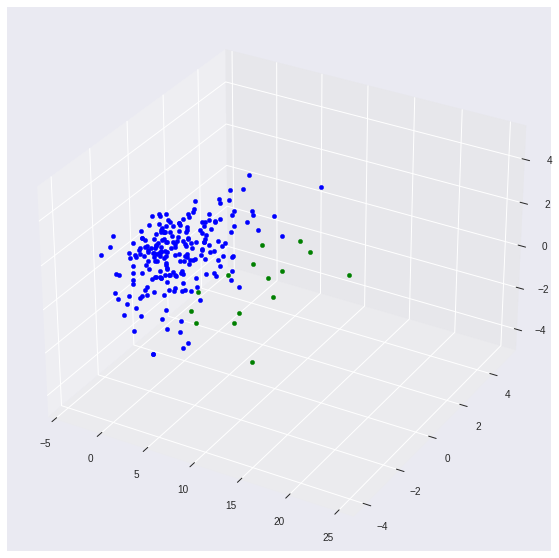

In [106]:
plot_3d_data(X_red3, agg_labels, (10,10), ('g', 'b'), True)

In [130]:
agg2_3_matrix, agg2_3_idx_0_0, agg2_3_idx_0_1, agg2_3_idx_1_0, agg2_3_idx_1_1 = compute_matrix(values, agg_labels)

In [131]:
print_matrix(agg2_3_matrix)

T 0|  209   3
R  |   
U 1|  11   12
E  |  0     1
        Groups


In [132]:
agregate_to_selected_index(agg2_3_idx_0_1)

In [133]:
from sklearn.cluster import MiniBatchKMeans

In [134]:
mbkm = MiniBatchKMeans(n_clusters=2).fit(X_red3)

In [135]:
mb_labels = mbkm.labels_
mb_labels

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

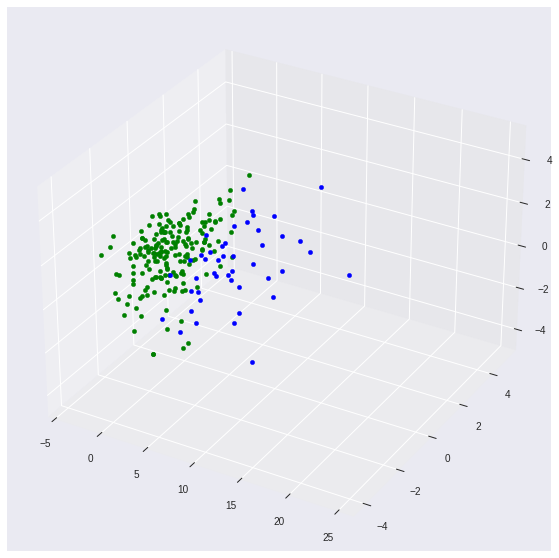

In [136]:
plot_3d_data(X_red3, mb_labels, (10,10), ('g', 'b'), True)

In [137]:
mb2_3_matrix, mb2_3_idx_0_0, mb2_3_idx_0_1, mb2_3_idx_1_0, mb2_3_idx_1_1 = compute_matrix(values, mb_labels)

In [138]:
print_matrix(mb2_3_matrix)

T 0|  26   186
R  |   
U 1|  19   4
E  |  0     1
        Groups


In [139]:
agregate_to_selected_index(mb2_3_idx_0_0)

In [141]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [147]:
X_lda = LinearDiscriminantAnalysis().fit_transform(X_sc, y)

/home/abel/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [148]:
X_lda

array([[-5.28057354e-01],
       [ 1.42044029e-01],
       [-1.08120598e+00],
       [-7.33306074e-01],
       [ 8.45136016e-01],
       [-2.41630887e-01],
       [-5.97420557e-02],
       [-8.77581634e-01],
       [ 9.19729686e-02],
       [ 2.39570924e+00],
       [-1.12014036e+00],
       [ 1.44008196e+00],
       [-2.00982053e-01],
       [-7.26606343e-01],
       [-1.10407488e+00],
       [-8.20797327e-01],
       [-1.24708466e+00],
       [-8.86025179e-01],
       [-5.74637117e-01],
       [ 1.04803806e-01],
       [ 2.88941379e+00],
       [ 4.35795299e-01],
       [-8.58696295e-01],
       [-9.63958334e-01],
       [-2.98813620e-01],
       [ 2.07787444e-01],
       [-4.27094738e-01],
       [-9.84422940e-01],
       [-7.89510465e-01],
       [-5.95220736e-01],
       [-7.35657667e-01],
       [-2.81341547e-01],
       [ 1.34587198e+00],
       [-9.11256238e-01],
       [-4.25284225e-01],
       [ 6.70559818e-01],
       [ 4.26882506e+00],
       [-2.56269396e-01],
       [-4.7

In [155]:
def plot_linear(X, labels, values):
    for i in range(len(X)):
        c = 'r' if values[i] == 1 else 'b'
        plt.scatter(X[i][0], labels[i], c=c)
    plt.show()

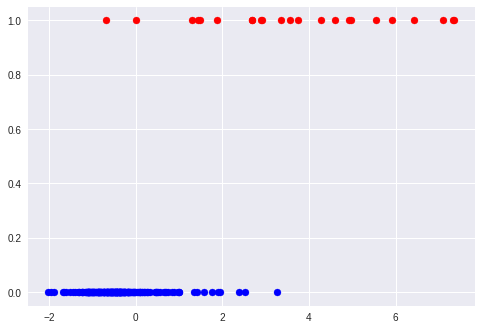

In [156]:
plot_linear(X_lda, values, values)

In [150]:
kmeans_lda = KMeans(n_clusters=2,
                n_init=10,
                init='random',
                tol=1e-4, 
                random_state=7,
                verbose=True).fit(X_red3)

Initialization complete
Iteration 0, inertia 4844.33991852051
Iteration 1, inertia 2422.082469818339
Iteration 2, inertia 1974.133480463935
Iteration 3, inertia 1882.207816299394
Iteration 4, inertia 1859.9768316040008
Iteration 5, inertia 1839.070072183141
Iteration 6, inertia 1826.490660633715
Iteration 7, inertia 1819.4758173042053
Iteration 8, inertia 1813.0944473379814
Iteration 9, inertia 1805.0270120865405
Iteration 10, inertia 1792.194993345829
Iteration 11, inertia 1783.052462651323
Iteration 12, inertia 1775.7934446807792
Iteration 13, inertia 1774.4872494044737
Converged at iteration 13: strict convergence.
Initialization complete
Iteration 0, inertia 3401.8975593426726
Iteration 1, inertia 2174.605108960546
Iteration 2, inertia 1985.9614168927076
Iteration 3, inertia 1912.9406002903618
Iteration 4, inertia 1874.204101434169
Iteration 5, inertia 1854.6223248219133
Iteration 6, inertia 1834.466824071231
Iteration 7, inertia 1826.490660633715
Iteration 8, inertia 1819.47581730

In [152]:
km_lda_labels =  kmeans_lda.labels_
km_lda_labels 

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

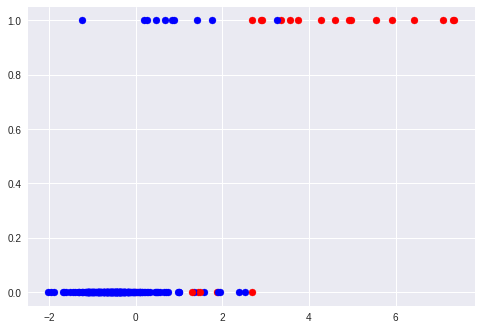

In [157]:
plot_linear(X_lda, km_lda_labels, values)

In [161]:
candidates = [i for i in range(len(km_lda_labels)) if km_lda_labels[i]==1 and values[i]==0]

In [162]:
candidates

[4, 35, 71, 91, 135, 169, 180, 184, 204, 205]

In [163]:
agregate_to_selected_index(candidates)

In [164]:
agg_lda = AgglomerativeClustering(n_clusters=2).fit(X_lda)

In [166]:
ag_lda_labels = agg_lda.labels_
ag_lda_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

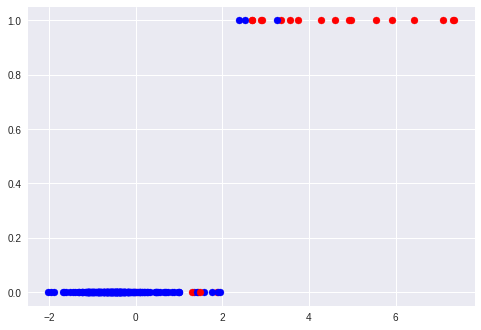

In [167]:
plot_linear(X_lda, ag_lda_labels, values)

In [169]:
candidates_ag = [i for i in range(len(ag_lda_labels)) if ag_lda_labels[i]==1 and values[i]==0]

In [170]:
candidates_ag

[9, 118, 180]

In [171]:
agregate_to_selected_index(candidates_ag)

In [172]:
mb_lda = MiniBatchKMeans(n_clusters=2).fit(X_lda)

In [173]:
mb_lda_labels = mb_lda.labels_

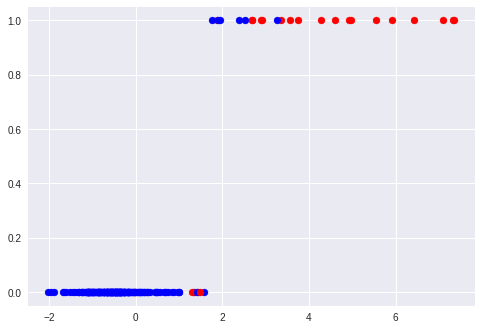

In [174]:
plot_linear(X_lda, mb_lda_labels, values)

In [175]:
candidates_mb = [i for i in range(len(mb_lda_labels)) if mb_lda_labels[i]==1 and values[i]==0]

In [176]:
candidates_mb

[9, 118, 135, 141, 180, 212]

In [177]:
agregate_to_selected_index(candidates_mb)

In [181]:
keys = [k for k in selected_index.keys()]
values = [v for v in selected_index.values()]

In [182]:
ind_v = []
for i in range(len(keys)):
    ind_v.append((keys[i],values[i]))

In [185]:
ind_v.sort(key=lambda x: x[1], reverse=True)

In [186]:
ind_v

[(180, 5),
 (71, 4),
 (91, 4),
 (135, 4),
 (184, 4),
 (4, 3),
 (35, 3),
 (169, 3),
 (204, 3),
 (205, 3),
 (9, 3),
 (118, 3),
 (141, 2),
 (212, 2),
 (8, 1),
 (32, 1),
 (58, 1),
 (81, 1),
 (84, 1),
 (100, 1),
 (103, 1),
 (113, 1),
 (158, 1),
 (167, 1),
 (171, 1),
 (209, 1)]

In [192]:
negro_lg_bat_df.reset_index(inplace=True)

In [193]:
negro_lg_bat_df

,index,retirement_age,debut_decade,retirament_decade,total_seasons,play_in_mayors,play_in_negro_league,two_way_player,2B_bt,3B_bt,AB_bt,BA_bt,BB_bt,G_bt,HR_bt,H_bt,OBP_bt,OPS+_bt,OPS_bt,PA_bt,RAA_bt,RAR_bt,RBI_bt,R_bt,Rbaser_bt,Rbat_bt,Rdp_bt,Rfield_bt,Rpos_bt,Rrep_bt,SLG_bt,TB_bt,WAA_bt,WAR_bt,dWAR_bt,oRAR_bt,oWAR_bt,A_fd,CG_fd,Ch_fd,DP_fd,E_fd,Fld%_fd,GS_fd,G_fd,Inn_fd,PO_fd,RF/9_fd,RF/G_fd,SB_bt,SH_bt,HoF
0,226,29,1920,1930,7,0,1,0,57.0,19.0,1168.0,0.275,137.0,302.0,16.0,321.0,0.357,97.0,0.755,1347.0,11.0,55.0,157.0,200.0,-1.0,-2.0,0.0,0.0,13.0,44.0,0.397,464.0,0.9,5.0,1.2,54.0,4.9,565.0,0.0,1013.0,77.0,64.0,0.937,199.0,304.0,1763.0,384.0,4.84,3.12,31.0,29.0,0
1,250,31,1940,1940,5,0,1,0,60.0,14.0,998.0,0.343,99.0,251.0,3.0,342.0,0.404,134.0,0.844,1130.0,74.0,108.0,138.0,195.0,-1.0,55.0,0.0,3.0,16.0,34.0,0.440,439.0,7.1,10.2,2.0,105.0,9.8,755.0,0.0,1418.0,103.0,71.0,0.950,247.0,250.0,2149.0,592.0,5.64,5.39,20.0,29.0,0
2,293,34,1930,1940,10,1,1,0,40.0,20.0,938.0,0.296,68.0,263.0,20.0,278.0,0.347,120.0,0.793,1031.0,17.0,52.0,147.0,131.0,-1.0,23.0,0.0,5.0,-10.0,35.0,0.446,418.0,1.4,4.7,-0.5,47.0,4.1,42.0,0.0,491.0,9.0,36.0,0.927,103.0,267.0,2063.2,413.0,1.98,1.70,11.0,20.0,0
3,311,32,1930,1940,10,0,1,0,31.0,9.0,633.0,0.276,56.0,173.0,3.0,175.0,0.337,105.0,0.705,702.0,2.0,25.0,84.0,97.0,1.0,-1.0,0.0,1.0,1.0,23.0,0.368,233.0,0.3,2.4,0.2,24.0,2.2,82.0,0.0,470.0,7.0,22.0,0.953,89.0,172.0,1611.2,366.0,2.50,2.60,24.0,11.0,0
4,372,46,1920,1940,19,0,1,0,150.0,52.0,3642.0,0.289,309.0,945.0,21.0,1052.0,0.347,100.0,0.723,4080.0,85.0,218.0,478.0,604.0,3.0,2.0,0.0,47.0,33.0,132.0,0.376,1369.0,7.7,20.5,7.2,170.0,15.7,1400.0,0.0,2865.0,215.0,184.0,0.936,390.0,959.0,4588.1,1281.0,5.26,2.80,138.0,116.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,12352,42,1920,1930,8,0,1,0,52.0,15.0,1019.0,0.288,48.0,333.0,16.0,293.0,0.321,95.0,0.737,1100.0,-3.0,35.0,159.0,153.0,0.0,-10.0,0.0,0.0,7.0,38.0,0.415,423.0,-0.3,3.5,0.7,35.0,3.4,95.0,0.0,633.0,18.0,17.0,0.973,43.0,296.0,915.1,521.0,6.06,2.08,14.0,30.0,0
231,12363,33,1930,1940,9,0,1,0,27.0,17.0,718.0,0.295,44.0,188.0,4.0,212.0,0.339,118.0,0.736,782.0,16.0,40.0,96.0,125.0,2.0,15.0,0.0,-3.0,2.0,25.0,0.397,285.0,1.6,3.9,-0.2,44.0,4.1,182.0,0.0,335.0,9.0,22.0,0.934,87.0,184.0,934.2,131.0,3.02,1.70,37.0,16.0,0
232,12377,31,1930,1940,8,0,1,0,26.0,14.0,821.0,0.296,102.0,230.0,14.0,243.0,0.377,114.0,0.790,948.0,12.0,44.0,140.0,125.0,0.0,21.0,0.0,2.0,-10.0,32.0,0.413,339.0,1.1,4.1,-0.8,42.0,3.7,41.0,0.0,439.0,10.0,13.0,0.970,130.0,230.0,2097.0,385.0,1.83,1.85,4.0,20.0,0
233,12426,34,1930,1940,8,1,1,0,34.0,8.0,607.0,0.275,45.0,167.0,8.0,167.0,0.327,112.0,0.724,663.0,1.0,23.0,87.0,92.0,0.0,7.0,0.0,-1.0,-6.0,22.0,0.397,241.0,0.1,2.2,-0.6,24.0,2.2,64.0,0.0,898.0,42.0,32.0,0.964,71.0,170.0,859.2,802.0,9.07,5.09,17.0,9.0,0


In [199]:
save_path = 'predictions_output/negro_league_candidates.txt'

In [201]:
with open(save_path, 'w') as file:
    for x, v in ind_v:
        idx_org = int(negro_lg_bat_df.iloc[x]['index'])
        player_name = bat_df.iloc[idx_org]['Full Name']
        url = bat_df.iloc[idx_org]['Url']
        print(f"{idx_org}--->{player_name}----->{url}")
        file.write(player_name + "-- Pertenence grade: "+ str(round(v/6,3))+'\n')

10299--->George Louis Scales----->https://www.baseball-reference.com//players/s/scalege01.shtml
4103--->James William Gilliam----->https://www.baseball-reference.com//players/g/gilliji01.shtml
5121--->Elston Gene Howard----->https://www.baseball-reference.com//players/h/howarel01.shtml
7445--->Allen Hurley McNair----->https://www.baseball-reference.com//players/m/mcnaihu01.shtml
10405--->Alphonse Eugene Smith----->https://www.baseball-reference.com//players/s/smithal04.shtml
372--->Newton Henry Allen----->https://www.baseball-reference.com//players/a/allenne02.shtml
1704--->Albert Dewey Creacy----->https://www.baseball-reference.com//players/c/creacde01.shtml
9712--->Branch Lee Russell----->https://www.baseball-reference.com//players/r/russebr01.shtml
11410--->Henry Curtis Thompson----->https://www.baseball-reference.com//players/t/thompha02.shtml
11481--->Clinton Cyrus Thomas----->https://www.baseball-reference.com//players/t/thomacl03.shtml
694--->John Christopher Beckwith----->https